

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Vía Segura: Análisis de datos para la seguridad vial en Barcelona

**Script**: Análisis de las personas implicadas

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import random
import folium
from tabulate import tabulate

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosPersona.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(path)

df.shape

<ipython-input-2-54eacd4b42ac>:5: DtypeWarning: Columns (18,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


(79647, 26)

In [3]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosTipoVehiculo.csv"

# Cargar el archivo en un DataFrame
df2 = pd.read_csv(path)

df2.shape

<ipython-input-3-adcfa28792ac>:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(path)


(118251, 23)

In [4]:
df2['Numero_expedient'].nunique()

62262

In [5]:
df['Numero_expedient'].nunique()

57686

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79647 entries, 0 to 79646
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Numero_expedient                         79647 non-null  object 
 1   Codi_districte                           79647 non-null  int64  
 2   Nom_districte                            79647 non-null  object 
 3   Codi_barri                               79647 non-null  int64  
 4   Nom_barri                                79647 non-null  object 
 5   Codi_carrer                              79647 non-null  int64  
 6   Nom_carrer                               74359 non-null  object 
 7   Descripcio_dia_setmana                   79647 non-null  object 
 8   Any                                      79647 non-null  int64  
 9   Mes_any                                  79647 non-null  int64  
 10  Dia_mes                                  79647

## Definición de funciones

### Histograma

In [7]:
def histograma(data, variable, titulo='', xlabel='', bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=variable, kde=True, color='skyblue', edgecolor='black', bins=bins)
    plt.title(titulo if titulo else f'Distribución de la variable {variable}', fontsize=16)
    plt.xlabel(xlabel if xlabel else variable, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=10)
    plt.tight_layout()
    plt.show()


### Sexo

In [8]:
def plotSexo(df, nomVariable, title):
    conteo = df[nomVariable].value_counts()
    tipos_esperados = ['Home', 'Dona', 'Desconegut']
    conteo = conteo.reindex(tipos_esperados, fill_value=0)
    paleta = sns.color_palette("rocket", len(conteo.index))
    paleta.sort(reverse=False)
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=conteo.index, y=conteo.values, hue=conteo.index, palette=paleta, dodge=False)
    plt.xlabel('Sexo')
    plt.ylabel('Cantidad')
    plt.title(title)
    plt.xticks(['Home', 'Dona', 'Desconegut'], ['Hombre', 'Mujer', 'Desconocido'])

    # Calculamos los porcentajes y los añadimos como etiquetas
    total = sum(conteo)
    for i in range(len(conteo)):
        porcentaje = '{:.1f}%'.format(100 * conteo.values[i] / total)
        plt.text(i, conteo.values[i] + 0.5, porcentaje, ha='center')

    plt.show()

# Ejemplo de uso:
# plotSexo(df, 'Descripcio_sexe', 'Conteo del Sexo de los implicados')

### Boxplots

In [9]:
def plotBoxplot(df, x_variable, title, x_label):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_variable, data=df, fill = False, showmeans=True, meanline=True, meanprops= {'color' : 'green'}, medianprops={'color': 'red'})
    plt.title(title)
    plt.xlabel(x_label)
    mean_value = np.mean(df[x_variable])
    median_value = np.median(df[x_variable])

    # Imprime los valores
    print(f"Valor de la media: {mean_value:.2f}")
    print(f"Valor de la mediana: {median_value:.2f}")
    plt.show()

# Ejemplo de uso:
# plotBoxplot(df, 'Edat', 'Edad de los implicados', 'Edad')


In [10]:
def plotMultipleBoxplots(dataframes, x_variable, titles, x_label):
    num_plots = len(dataframes)
    plt.figure(figsize=(10, 6))

    for i in range(num_plots):
        plt.subplot(num_plots, 1, i+1)
        sns.boxplot(x=x_variable, data=dataframes[i], fill=False, showmeans=True, meanline=True, meanprops={'color': 'green'}, medianprops={'color': 'red'})
        plt.title(titles[i])
        plt.xlabel(x_label)
        mean_value = np.mean(dataframes[i][x_variable])
        median_value = np.median(dataframes[i][x_variable])

        # Imprime los valores
        print(f"\nValor de la media en {titles[i]}: {mean_value:.2f}")
        print(f"Valor de la mediana en {titles[i]}: {median_value:.2f}\n")

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plotMultipleBoxplots([df_herido_leve, df_herido_grave, df_muerto], 'Edat', ['Herido Leve', 'Herido Grave', 'Muerto'], 'Edad')

### Barplot Categorías

In [11]:
def plotBarplot(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcula el porcentaje
        x = p.get_x() + p.get_width() / 2  # Posición x del texto
        y = p.get_height()  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='center', va='bottom', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.grid(axis='y')  # Mostrar líneas de la cuadrícula solo en el eje y
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotBarplot(df, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')


In [12]:
def plotHorizontalBarplot(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotHorizontalBarplot(df, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Frecuencia', 'Tipo de Lesión')

In [13]:
def plotHorizontalBarplotByHorario(df, variable, horario_column, title, xlabel, ylabel):
    # Agrupar por 'variable' y 'Horario' y contar las ocurrencias
    conteo = df.groupby([variable, horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'Matí': 'green', 'Tarda': 'orange', 'Nit': 'navy'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Horario')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

# Ejemplo de uso:
# plotHorizontalBarplotByHorario(df, 'Causa_conductor', 'Horario', 'Frecuencia de las causas de accidente por parte de conductores según el horario', 'Frecuencia', 'Causa')

### Mapa

In [14]:
def createMap(df, lat_col, lon_col, popup_col):
    # Ubicación central de Barcelona
    mapa = folium.Map(location=[41.3888, 2.159], zoom_start=12) # Coordenadas del centro de Barcelona

    for index, row in df.iterrows():
        lat = row[lat_col]
        lon = row[lon_col]
        popup = row[popup_col]
        folium.Marker([lat, lon], popup=popup).add_to(mapa)

    return mapa

# Ejemplo de uso:
# mapa = createMap(df, 'Latitud', 'Longitud', 'Numero_expedient')
# mapa

### Funciones a retocar

In [15]:
def plotVariableCantidad(df, df_subset, nomVariable, numTop, title, xlb, ylb):
    top = df_subset[nomVariable].value_counts().head(numTop).index
    topTipos = df_subset[df_subset[nomVariable].isin(top)]
    conteo = topTipos[nomVariable].value_counts()
    mediaPorTipo = df.query('ImpPrimaNeta != -1').groupby(nomVariable)['ImpPrimaNeta'].mean()
    grupos_ploteados = conteo.index

    plt.figure(figsize=(10, 6))
    paleta = sns.color_palette("Blues", len(grupos_ploteados))
    paleta.sort(reverse=False)
    sns.barplot(x=conteo.index, y=conteo.values, palette=paleta, hue=conteo.index)
    plt.title(title)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    plt.xticks(rotation=45, ha='right')

    for i, grupo in enumerate(grupos_ploteados):
        if grupo in mediaPorTipo.index:
            plt.text(i, conteo[grupo], f"{mediaPorTipo[grupo]:.2f}", ha='center', va='bottom')

    plt.show()

# Ejemplo de uso:
# plotVariableCantidad(df, df_mejores, 'GrupoRamo', 10, 'Pólizas más vendidas por el 25% mejor según líquidos (2019-2023)', 'Grupo de ramo', 'Cantidad')


In [16]:
def plotVariableImporte(df, df_subset, nomVariable, numTop, title, xlb, ylb):
    tipos_polizas_sum = df_subset.groupby(nomVariable)['ImpPrimaNeta'].sum()
    tipos_polizas_sum_sorted = tipos_polizas_sum.sort_values(ascending=False).head(numTop)
    media_por_grupo = df.query('ImpPrimaNeta!=-1').groupby(nomVariable)['ImpPrimaNeta'].mean()
    grupos_ploteados = tipos_polizas_sum_sorted.index

    paleta = sns.color_palette("Greens", len(grupos_ploteados))
    paleta.sort(reverse=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tipos_polizas_sum_sorted.index, y=tipos_polizas_sum_sorted.values, palette=paleta, hue=tipos_polizas_sum_sorted.index)
    plt.title(title)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    plt.xticks(rotation=45, ha='right')

    # Definir la escala del eje y
    max_y_value = tipos_polizas_sum_sorted.max()
    y_ticks = range(0, int(max_y_value) + int(max_y_value * 0.1), int(max_y_value * 0.1))
    y_labels = [f"{val:,.0f}".replace(',', '.') for val in y_ticks]

    plt.yticks(y_ticks, y_labels)

    for i, grupo in enumerate(grupos_ploteados):
        if grupo in media_por_grupo.index:
            plt.text(i, tipos_polizas_sum_sorted[grupo], f"{media_por_grupo[grupo]:.2f}", ha='center', va='bottom')

    plt.show()

# Ejemplo de uso:
# plotVariableCantidad(df, df_mejores, 'GrupoRamo', 10, 'Pólizas más vendidas por el 25% mejor según líquidos (2019-2023)', 'Grupo de ramo', 'Importe')


In [17]:
def plotClientesConPolizas(df, title):
    cliente_poliza_counts = df.groupby('KeyVarCliente')['KeyVarPoliza'].nunique()
    una_poliza = cliente_poliza_counts.to_frame().query('KeyVarPoliza == 1').shape[0]
    total_clientes = cliente_poliza_counts.to_frame().shape[0]
    porcentaje_una_poliza = (una_poliza / total_clientes) * 100
    porcentaje_mas_de_una_poliza = 100 - porcentaje_una_poliza

    porcentajes = [ porcentaje_una_poliza , porcentaje_mas_de_una_poliza]

    categorias = ['Una póliza', 'Más de una póliza']

    plt.figure(figsize=(8, 6))
    plt.bar(categorias, porcentajes, color=['blue', 'orange'])

    plt.title(title)
    plt.xlabel('Número de pólizas')
    plt.ylabel('Porcentaje')

    for i, porcentaje in enumerate(porcentajes):
        plt.text(i, porcentaje, f'{porcentaje:.2f}%', ha='center', va='bottom')

    plt.show()

# Ejemplo de uso:
# plotClientesConPolizas(df)

## Tratamiento de variables

### Descripcio_victimitzacio

In [18]:
df['Descripcio_lesions'] = df['Descripcio_victimitzacio']

# Estandarizar los valores de la columna Descripcio_victimitzacio
df['Descripcio_victimitzacio'] = df['Descripcio_victimitzacio'].replace({
    'Ferit lleu: Hospitalització fins a 24h': 'Ferit lleu',
    'Ferit lleu: Amb assistència sanitària en lloc d\'accident': 'Ferit lleu',
    'Ferit lleu: Rebutja assistència sanitària': 'Ferit lleu',
    'Ferit lleu: Amb assistčncia sanitŕria en lloc d\'accident': 'Ferit lleu',
    'Ferit lleu: Rebutja assistčncia sanitŕria': 'Ferit lleu',
    'Ferit greu: hospitalització superior a 24h': 'Ferit greu',
    'Mort (dins 24h posteriors accident)': 'Mort',
    'Mort (després de 24h posteriors accident)': 'Mort',
    'Mort natural': 'Mort',
    'Il.lčs': 'Il·lès',
    'Es desconeix': 'Desconegut'
})

# Estandarizar los valores de la columna Descripcio_lesions
df['Descripcio_lesions'] = df['Descripcio_lesions'].replace({
    'Ferit lleu: Amb assistčncia sanitŕria en lloc d\'accident': 'Ferit lleu: Amb assistència sanitària en lloc d\'accident',
    'Ferit lleu: Rebutja assistčncia sanitŕria': 'Ferit lleu: Rebutja assistència sanitària',
    'Il.lčs': 'Il·lès',
    'Es desconeix': 'Desconegut'
})

### Desc_Tipus_vehicle_implicat

In [19]:
df['Desc_Tipus_vehicle_implicat'].value_counts()

Desc_Tipus_vehicle_implicat
Motocicleta                            36761
Turisme                                15651
Ciclomotor                              5535
Bicicleta                               5056
Turismo                                 3464
Autobús                                 3198
Veh. mobilitat personal amb motor       2703
Furgoneta                               2672
Taxi                                    2050
Autobús articulat                        968
Camió rígid <= 3,5 tones                 314
Camió rígid > 3,5 tones                  252
Tot terreny                              225
Altres vehicles amb motor                132
Veh. mobilitat personal sense motor      105
Tractor camió                             84
Autocar                                   64
Camión <= 3,5 Tm                          54
Tren o tramvia                            51
Desconegut                                51
Altres vehicles sense motor               34
Tranvía o tren             

In [20]:
# Definir un diccionario de mapeo para agrupar los tipos de vehículos
tipo_vehiculo_mapping = {
    'Taxi': 'Taxi',
    'Motocicleta': 'Motocicleta',
    'Turismo': 'Automóvil',
    'Turisme':'Automóvil',
    'Ciclomotor':'Motocicleta',
    'Autobús': 'Autobús',
    'Furgoneta': 'Vehículo Comercial',
    'Tractocamión': 'Camión',
    'Bicicleta': 'Bicicleta',
    'Camión <= 3,5 Tm': 'Camión',
    'Autobús articulado': 'Autobús',
    'Autobús articulat':'Autobús',
    'Todo terreno': 'Automóvil',
    'Tranvía o tren': 'Tren/Tranvía',
    'Otros vehíc. a motor': 'Otros Vehículos Motorizados',
    'Autocar': 'Autobús',
    'Camión > 3,5 Tm': 'Camión',
    'Cuadriciclo >=75cc': 'Motocicleta',
    'Maquinaria de obras': 'Otros Vehículos Motorizados',
    'Cuadriciclo <75cc': 'Motocicleta',
    'Autocaravana': 'Automóvil',
    'Altres vehicles sense motor': 'Otros Vehículos No Motorizados',
    'Camió rígid <= 3,5 tones': 'Camión',
    'Altres vehicles amb motor': 'Otros Vehículos Motorizados',
    'Quadricicle > 75 cc': 'Motocicleta',
    'Camió rígid > 3,5 tones': 'Camión',
    'Tren o tramvia': 'Tren/Tranvía',
    "Maquinària d'obres i serveis": 'Otros Vehículos Motorizados',
    'Tractor camió': 'Camión',
    'Tot terreny': 'Automóvil',
    'Quadricicle < 75 cc': 'Motocicleta',
    'Desconegut': 'Desconocido',
    'Microbus <= 17': 'Autobús',
    'Veh. mobilitat personal amb motor': 'Vehículo Personal Motorizado',
    'Veh. mobilitat personal sense motor': 'Vehículo Personal No Motorizado',
    'Microbús <= 17': 'Autobús',
    'Carro': 'Otros Vehículos No Motorizados',
    'Pick-up': 'Vehículo Comercial',
    "Maquinŕria d'obres i serveis": 'Otros Vehículos Motorizados',
    'Ambulŕncia': 'Ambulancia',
    'Ambulància': 'Ambulancia',
    'Tricicle': 'Bicicleta'
}

# Crear la nueva columna con los tipos de vehículos agrupados
df['Tipo_Vehiculo_Agrupado'] = df['Desc_Tipus_vehicle_implicat'].map(tipo_vehiculo_mapping)



In [21]:
df['Tipo_Vehiculo_Agrupado'].value_counts()

Tipo_Vehiculo_Agrupado
Motocicleta                        42333
Automóvil                          19363
Bicicleta                           5059
Autobús                             4249
Vehículo Personal Motorizado        2703
Vehículo Comercial                  2676
Taxi                                2050
Camión                               731
Otros Vehículos Motorizados          185
Vehículo Personal No Motorizado      105
Tren/Tranvía                          81
Desconocido                           51
Otros Vehículos No Motorizados        36
Ambulancia                            25
Name: count, dtype: int64

### Descripcio_Motiu_desplaçament_vianant

In [22]:
# Estandarizar los valores de la columna Descripcio_Motiu_desplaçament_vianant
df['Descripcio_Motiu_desplaçament_vianant'] = df['Descripcio_Motiu_desplaçament_vianant'].replace({
    'Es desconeix': 'Desconegut',
    'Transport de menors al colˇlegi': 'Transport de menors al col·legi',
    'Bombers, policia, ambulŕncia': 'Bombers, policia, ambulància',
    np.nan: 'Desconegut'
})

### Descripcio_causa_vianant

In [23]:
# Estandarizar los valores de la columna Descripcio_causa_vianant
df['Descripcio_causa_vianant'] = df['Descripcio_causa_vianant'].replace({
    'Desobeir el senyal del semŕfor': 'Desobeir el senyal del semàfor',
})

### Descripcio_situacio

In [24]:
# Estandarizar los valores de la columna Descripcio_situacio
df['Descripcio_situacio'] = df['Descripcio_situacio'].replace({
    'Presentat': 'Presentado',
    np.nan: 'Desconegut',
    'Altres': 'Otros',
    'Citat': 'Citado',
    'Desconegut': 'Desconocido',
})

### Descripcio_Lloc_atropellament_vianant

In [25]:
# Estandarizar los valores de la columna Descripcio_Lloc_atropellament_vianant
df['Descripcio_Lloc_atropellament_vianant'] = df['Descripcio_Lloc_atropellament_vianant'].replace({
    'En pas regulat per semàfor                                                                                                                            ': 'En paso regulado por semáforo',
    np.nan: 'Desconocido',
    'N/A                                                                                                                                    ': 'Desconocido',
    'Fora del pas                                                                                                                                          ': 'Fuera del paso',
    'En pas sense regular                                                                                                                                  ': 'En paso sin regular',
    'Altres                                                                                                                                                ': 'Otros',
    'En zona peatonal                                                                                                                                      ': 'En zona peatonal',
    'A la vorera / Andana                                                                                                                                  ': 'En la andana',
    'En pas sense senyalitzar                                                                                                                              ': 'En paso sin señalizar',
    'Desconegut                                                                                                                                            ': 'Desconocido',
    'En pas regulat per semŕfor                                                                                                                            ': 'En paso regulado por semáforo'
})

### Descripcio_Motiu_desplaçament_conductor

In [26]:
# Asignar nuevos nombres a los valores existentes en la columna
df['Descripcio_Motiu_desplaçament_conductor'] = df['Descripcio_Motiu_desplaçament_conductor'].replace({
    'Oci i entreteniment': 'Ocio y entretenimiento',
    'Taxi': 'Taxi',
    'Es desconeix': 'Desconocido',
    'In itinere': 'En itinere',
    'Altres activitats': 'Otras actividades',
    'En missió': 'En misión',
    'Bus urbà': 'Autobús urbano',
    'Bus de línia regular': 'Autobús de línea regular',
    'Transport professional de mercaderies': 'Transporte profesional de mercancías',
    "Estudiant cap a centre d'estudis": 'Estudiante hacia centro de estudios',
    'Bombers, policia, ambulància': 'Bomberos, policía, ambulancia',
    'Activitat esportiva particular': 'Actividad deportiva particular',
    'Bus de línia discrecional': 'Autobús de línea discrecional',
    "Transport de menors a l'escola": 'Transporte de menores a la escuela',
    "En pràctiques d'autoescola": 'En prácticas de autoescuela',
    "Servei de neteja o recollida d'escombraries": 'Servicio de limpieza o recogida de basura',
    'Servei de manteniment viari': 'Servicio de mantenimiento vial',
    "Servei d'auxili en carretera": 'Servicio de auxilio en carretera',
    'Bus urbŕ': 'Autobús urbano', # Corrección de caracteres extraños
    'In itínere': 'En itinere', # Corrección de caracteres extraños
    'Bombers, policia, ambulŕncia': 'Bomberos, policía, ambulancia', # Corrección de caracteres extraños
    'Bus en transport de menors': 'Autobús en transporte de menores',
    'Bus escolar': 'Autobús escolar',
    'Anada/tornada de ponts, festius, vacances': 'Ida/vuelta de puentes, festivos, vacaciones',
    "En prŕctiques d'autoescola": 'En prácticas de autoescuela', # Corrección de caracteres extraños
    'Desconegut': 'Desconocido',
})

# Reemplazar NaN con 'Desconocido'
df['Descripcio_Motiu_desplaçament_conductor'] = df['Descripcio_Motiu_desplaçament_conductor'].fillna('Desconocido')


In [27]:
# Crear un diccionario que mapee los valores específicos a la categoría más genérica
mapping = {
    'Autobús urbano': 'Autobús',
    'Autobús de línea regular': 'Autobús',
    'Autobús de línea discrecional': 'Autobús',
    'Autobús en transporte de menores': 'Autobús',
    'Autobús escolar': 'Autobús',
    'Transporte profesional de mercancías': 'En itinere',
    'Servicio de limpieza o recogida de basura': 'Servicios públicos',
    'Servicio de mantenimiento vial': 'Servicios públicos',
    'Servicio de auxilio en carretera': 'Servicios públicos'
}

# Aplicar el mapeo y crear una nueva columna 'Motivo_desplazamiento'
df['Motivo_desplazamiento'] = df['Descripcio_Motiu_desplaçament_conductor'].replace(mapping)


## Plots

### Baseline

#### Sexo

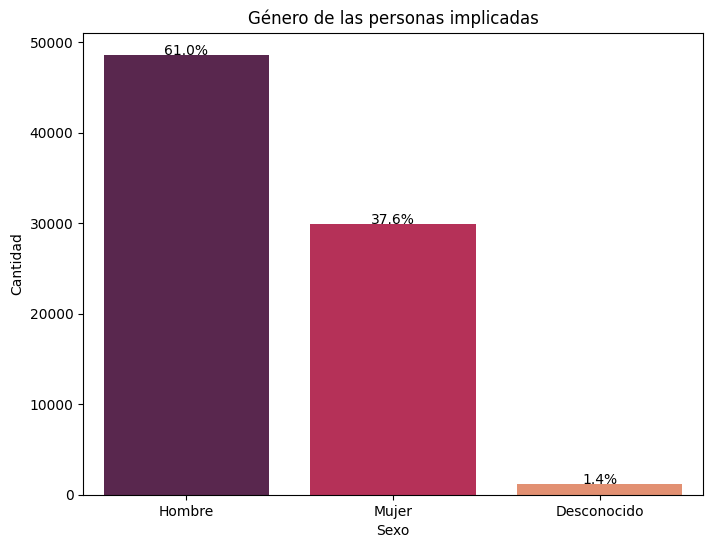

In [28]:
plotSexo(df, 'Descripcio_sexe', 'Género de las personas implicadas')

#### Edad

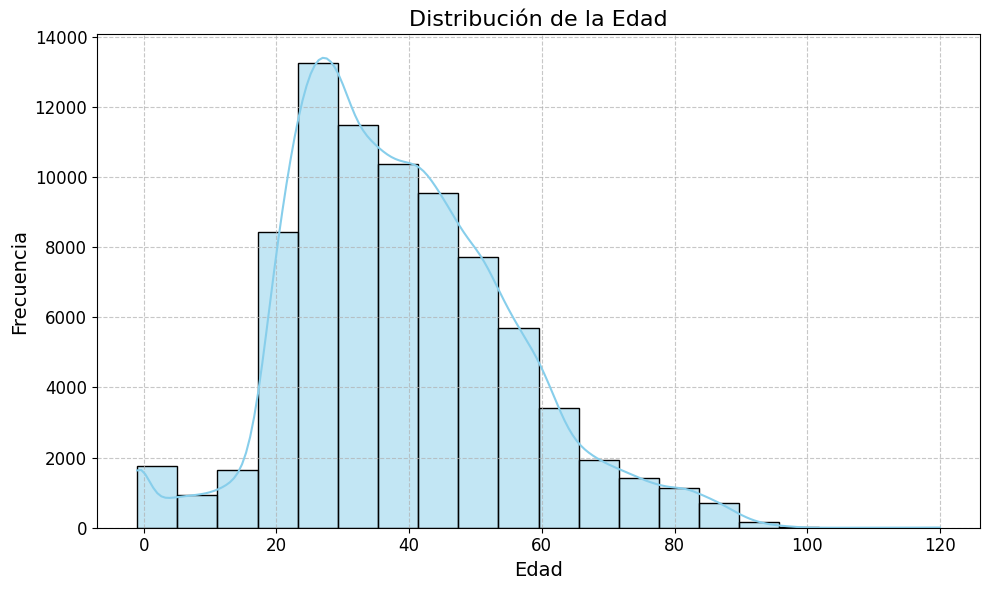

In [29]:
histograma(df, 'Edat', 'Distribución de la Edad', xlabel='Edad')

Valor de la media: 38.79
Valor de la mediana: 37.00


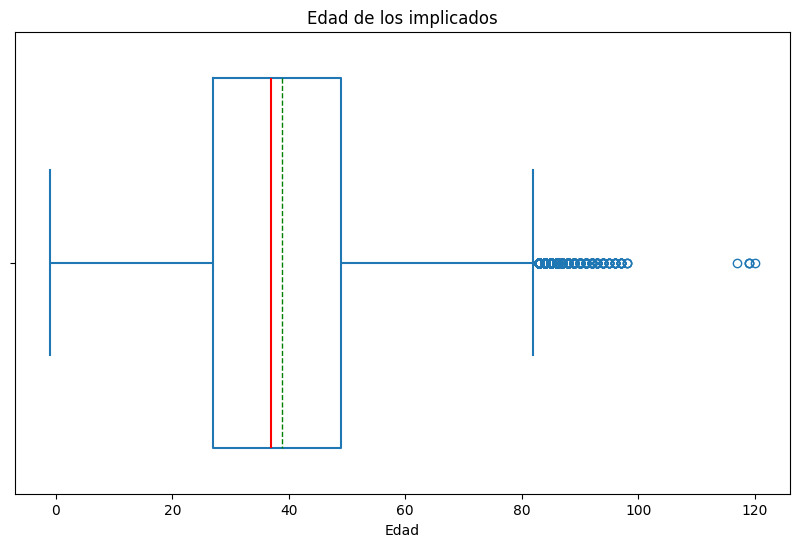

In [30]:
plotBoxplot(df, 'Edat', 'Edad de los implicados', 'Edad')

#### Situación de las víctimas

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


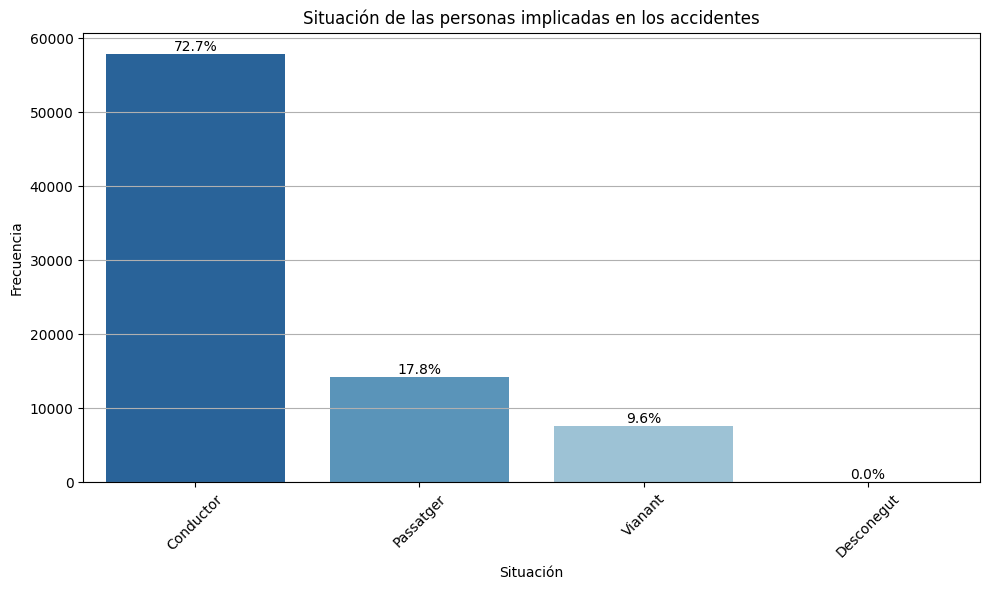

In [31]:
plotBarplot(df, 'Descripcio_tipus_persona', 'Situación de las personas implicadas en los accidentes', 'Situación', 'Frecuencia')

#### Gravedad de las lesiones

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


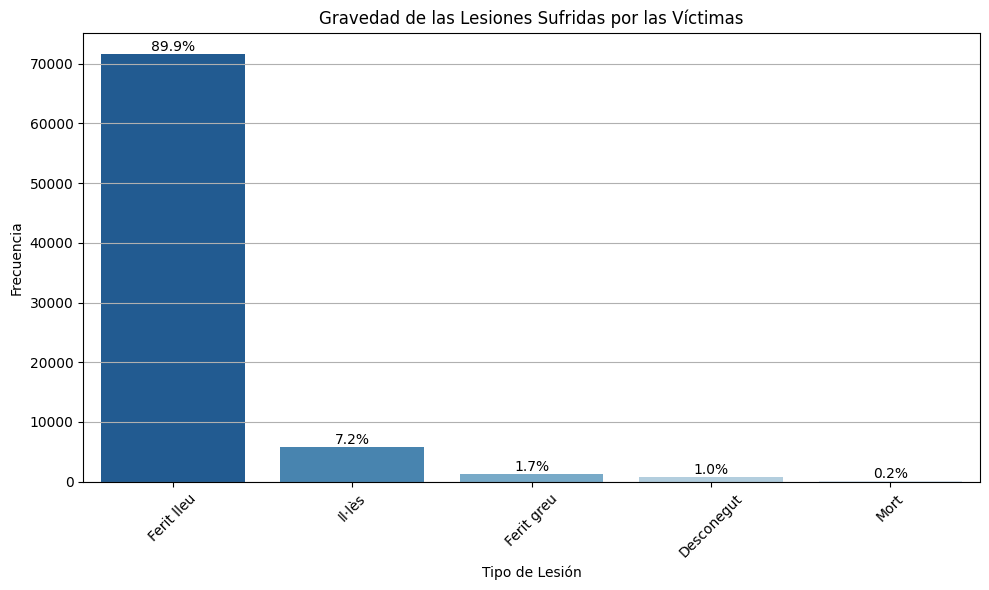

In [32]:
plotBarplot(df, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')

#### Tipos de Vehículo implicados

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


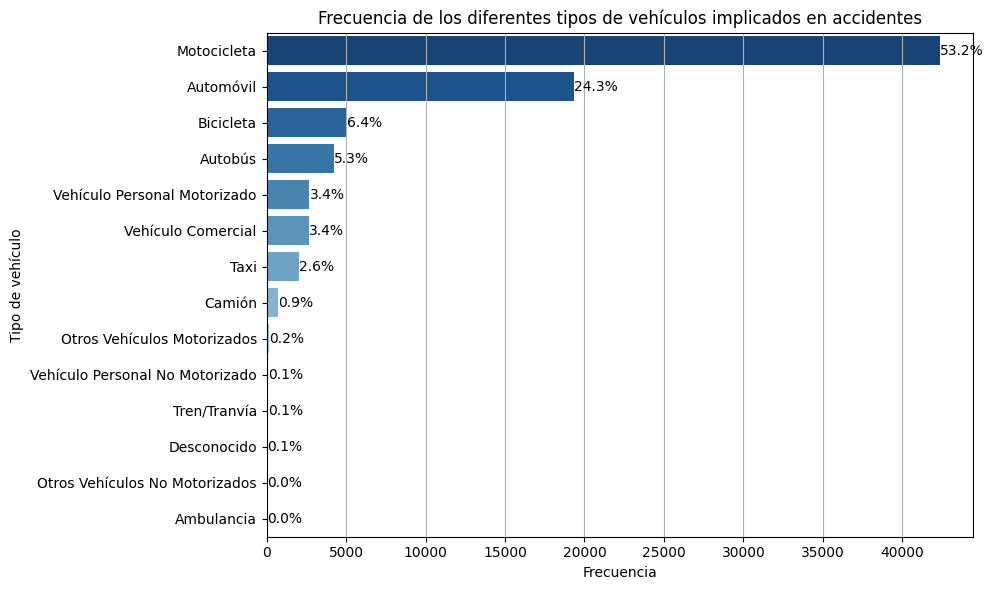

In [33]:
plotHorizontalBarplot(df, 'Tipo_Vehiculo_Agrupado', 'Frecuencia de los diferentes tipos de vehículos implicados en accidentes', 'Frecuencia', 'Tipo de vehículo')

### Gravedad de las lesiones

In [34]:
herido_leve = ['Ferit lleu', 'Ferit lleu: Hospitalització fins a 24h', 'Ferit lleu: Amb assistència sanitària en lloc d\'accident',
               'Ferit lleu: Rebutja assistència sanitària']

herido_grave = ['Ferit greu', 'Ferit greu: hospitalització superior a 24h']

muerto = ['Mort', 'Mort (dins 24h posteriors accident)', 'Mort (després de 24h posteriors accident)', 'Mort natural']

df_herido_leve = df[df['Descripcio_lesions'].isin(herido_leve)]
df_herido_grave = df[df['Descripcio_lesions'].isin(herido_grave)]
df_muerto = df[df['Descripcio_lesions'].isin(muerto)]



Valor de la media en Heridos Leves: 38.77
Valor de la mediana en Heridos Leves: 36.00


Valor de la media en Heridos Graves: 43.09
Valor de la mediana en Heridos Graves: 42.00


Valor de la media en Fallecidos: 47.82
Valor de la mediana en Fallecidos: 44.50



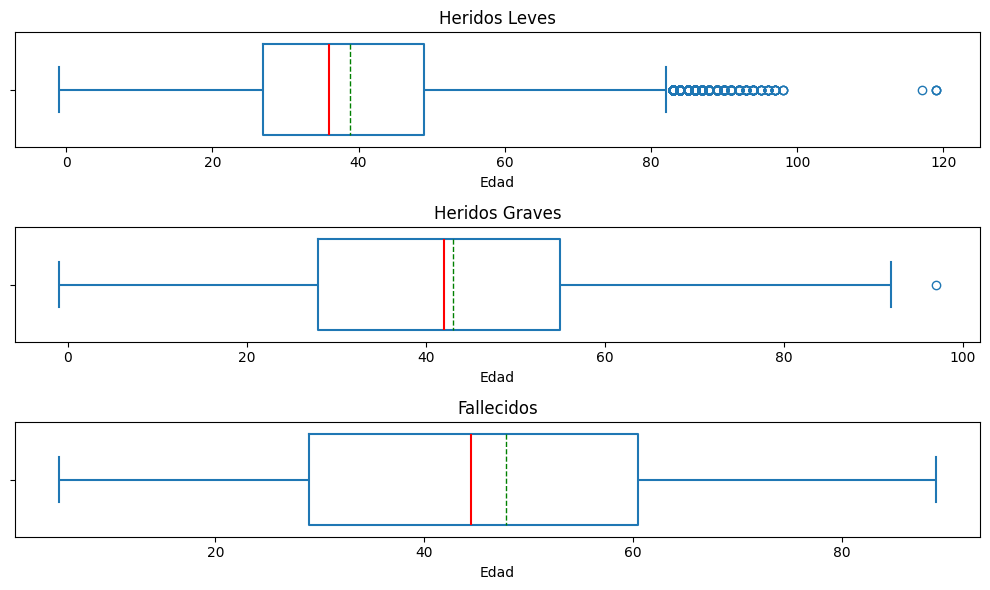

In [35]:
plotMultipleBoxplots([df_herido_leve, df_herido_grave, df_muerto], 'Edat', ['Heridos Leves', 'Heridos Graves', 'Fallecidos'], 'Edad')

#### Heridos leves

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


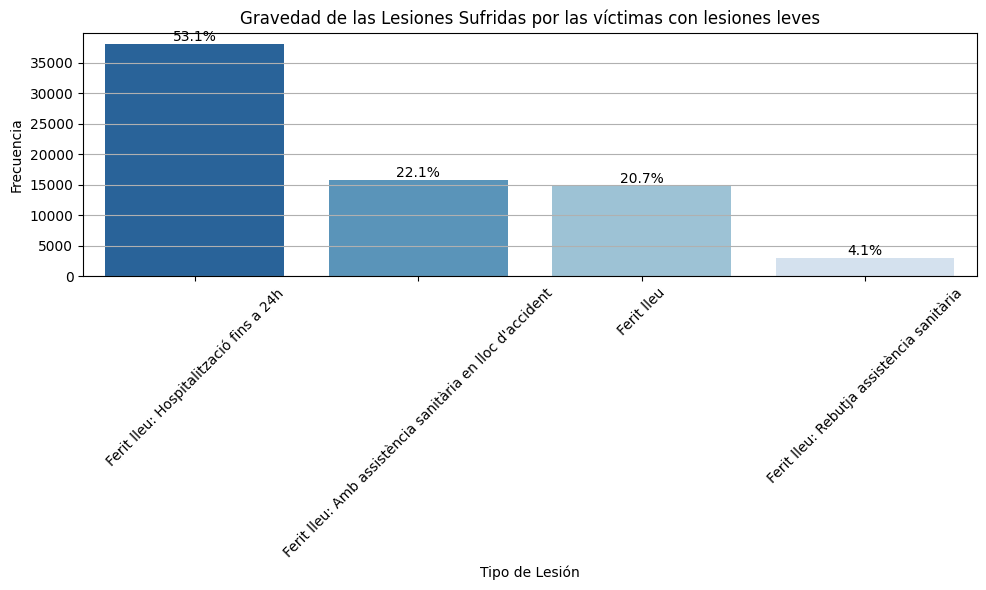

In [36]:
plotBarplot(df_herido_leve, 'Descripcio_lesions', 'Gravedad de las Lesiones Sufridas por las víctimas con lesiones leves', 'Tipo de Lesión', 'Frecuencia')

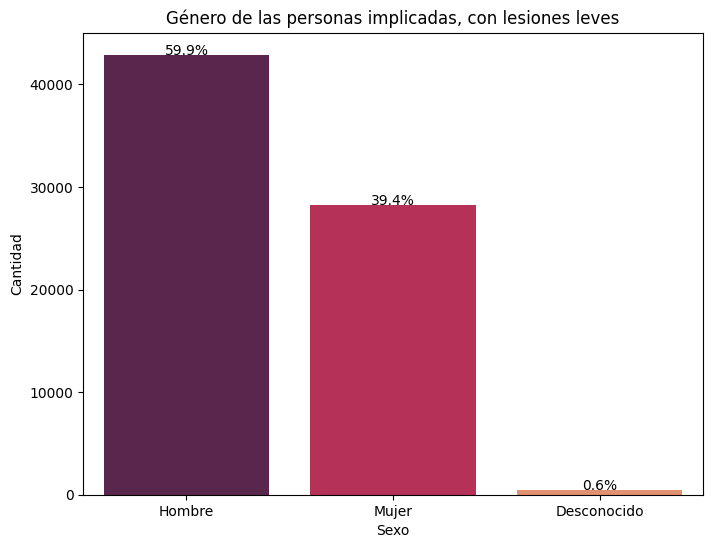

In [37]:
plotSexo(df_herido_leve, 'Descripcio_sexe', 'Género de las personas implicadas, con lesiones leves')

Valor de la media: 38.77
Valor de la mediana: 36.00


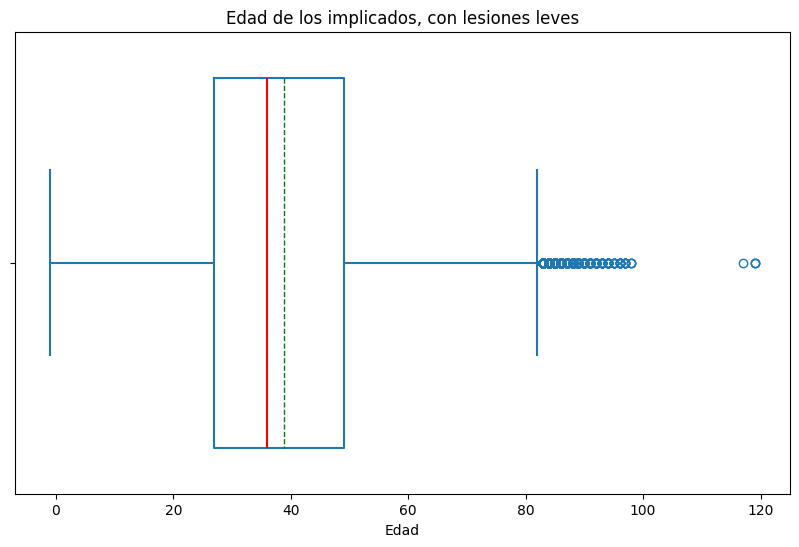

In [38]:
plotBoxplot(df_herido_leve, 'Edat', 'Edad de los implicados, con lesiones leves', 'Edad')

#### Heridos graves

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


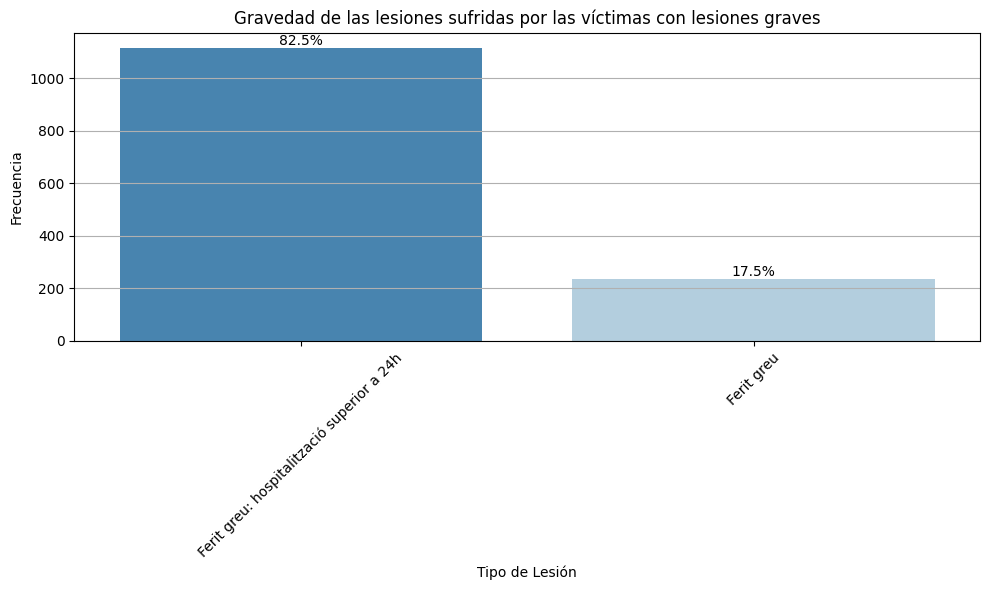

In [39]:
plotBarplot(df_herido_grave, 'Descripcio_lesions', 'Gravedad de las lesiones sufridas por las víctimas con lesiones graves', 'Tipo de Lesión', 'Frecuencia')

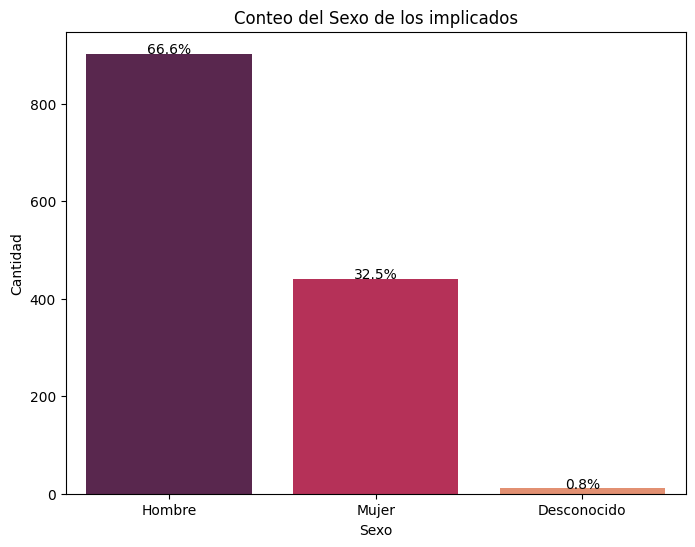

In [40]:
plotSexo(df_herido_grave, 'Descripcio_sexe', 'Conteo del Sexo de los implicados')

Valor de la media: 43.09
Valor de la mediana: 42.00


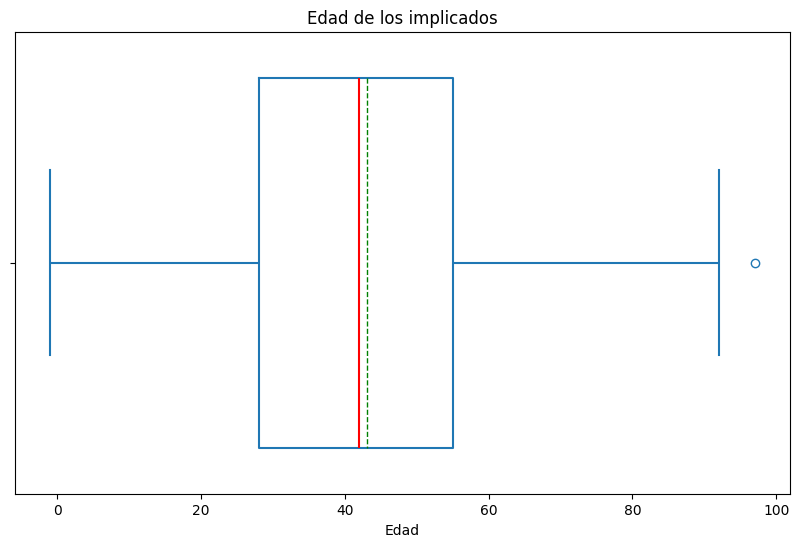

In [41]:
plotBoxplot(df_herido_grave, 'Edat', 'Edad de los implicados', 'Edad')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


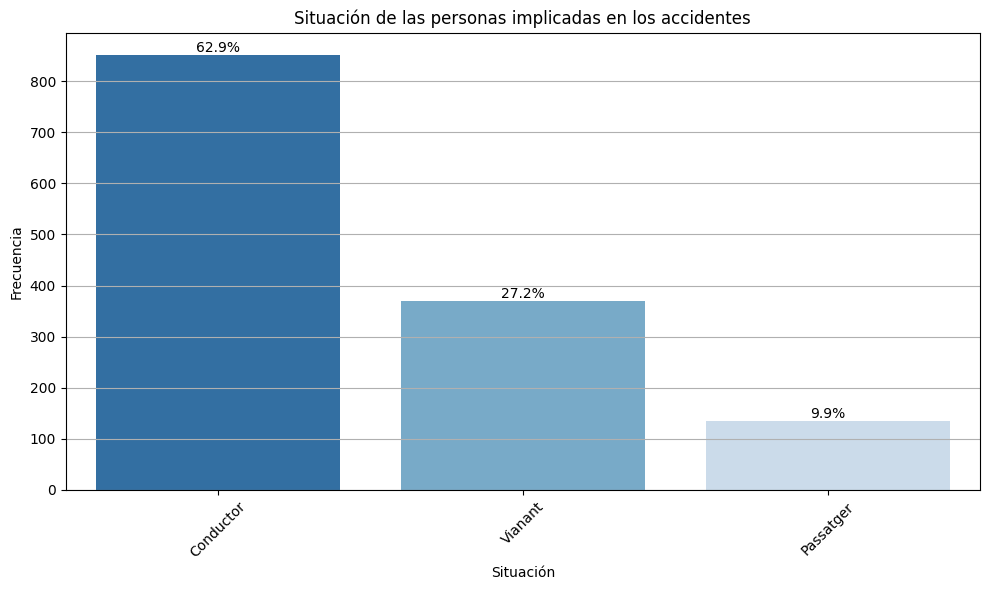

In [42]:
plotBarplot(df_herido_grave, 'Descripcio_tipus_persona', 'Situación de las personas implicadas en los accidentes', 'Situación', 'Frecuencia')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


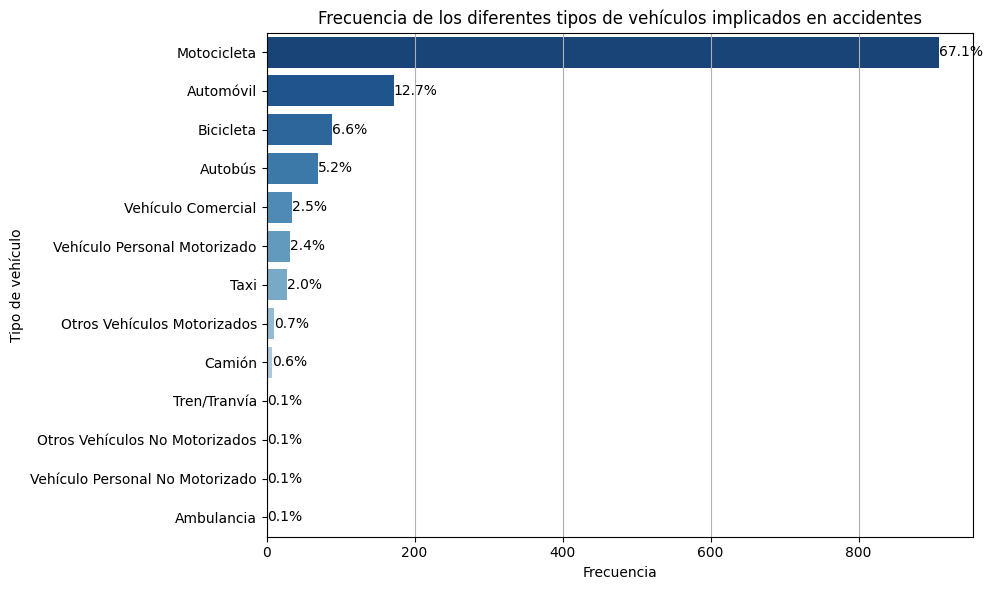

In [43]:
plotHorizontalBarplot(df_herido_grave, 'Tipo_Vehiculo_Agrupado', 'Frecuencia de los diferentes tipos de vehículos implicados en accidentes', 'Frecuencia', 'Tipo de vehículo')

#### Fallecidos

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


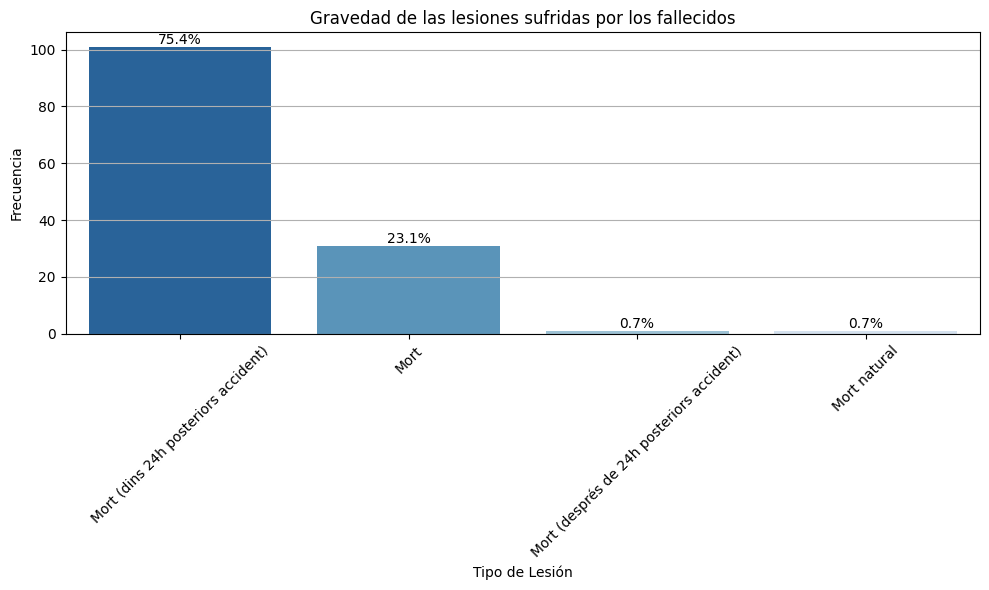

In [44]:
plotBarplot(df_muerto, 'Descripcio_lesions', 'Gravedad de las lesiones sufridas por los fallecidos', 'Tipo de Lesión', 'Frecuencia')

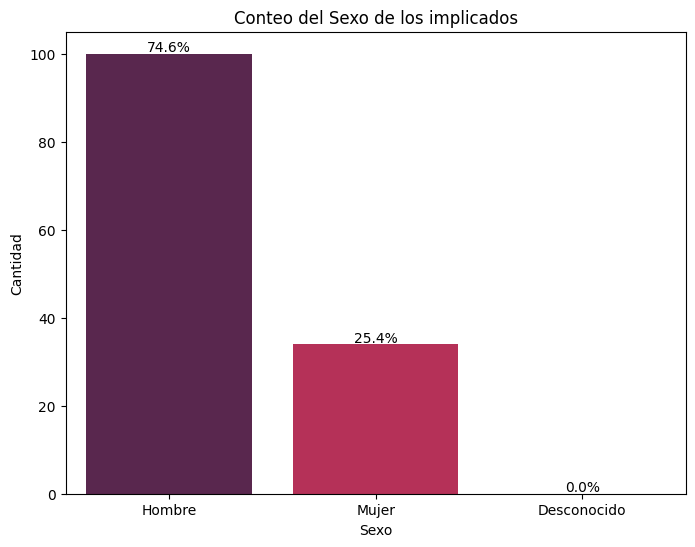

In [45]:
plotSexo(df_muerto, 'Descripcio_sexe', 'Conteo del Sexo de los implicados')

Valor de la media: 47.82
Valor de la mediana: 44.50


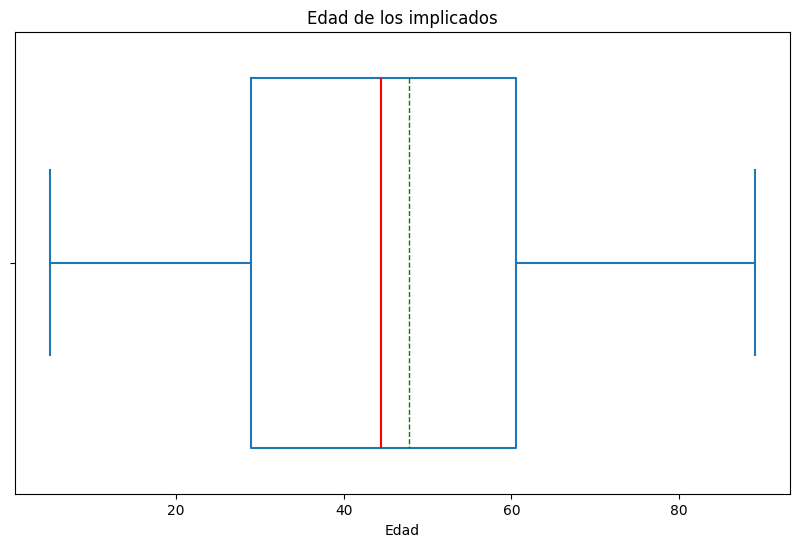

In [46]:
plotBoxplot(df_muerto, 'Edat', 'Edad de los implicados', 'Edad')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


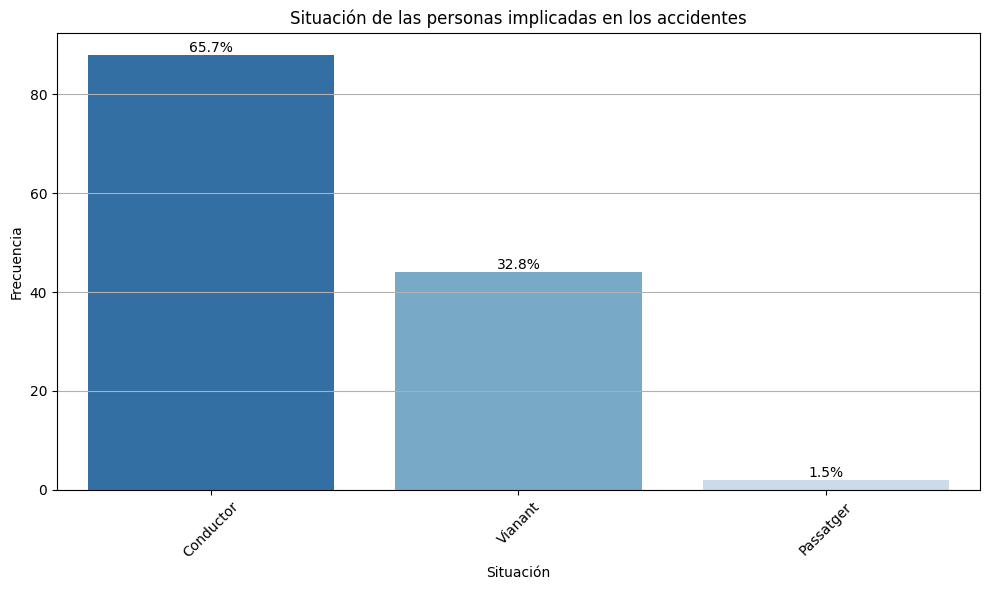

In [47]:
plotBarplot(df_muerto, 'Descripcio_tipus_persona', 'Situación de las personas implicadas en los accidentes', 'Situación', 'Frecuencia')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


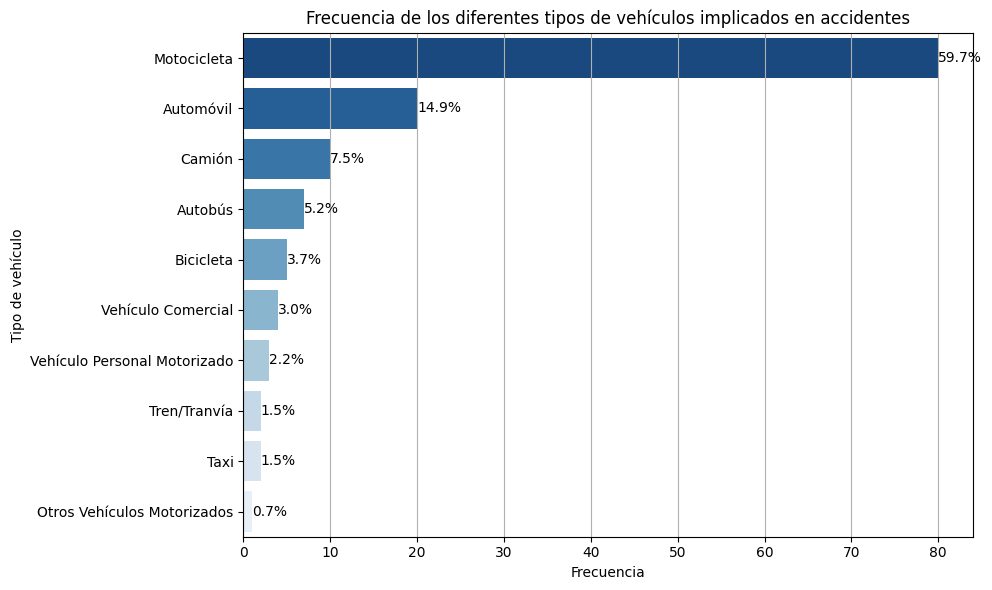

In [48]:
plotHorizontalBarplot(df_muerto, 'Tipo_Vehiculo_Agrupado', 'Frecuencia de los diferentes tipos de vehículos implicados en accidentes', 'Frecuencia', 'Tipo de vehículo')

### Tipos de Vehículo implicados

#### Motocicletas

In [49]:
motos = ['Motocicleta', 'Ciclomotor', 'Cuadriciclo >=75cc', 'Cuadriciclo <75cc', 'Quadricicle > 75 cc', 'Quadricicle < 75 cc']

df_motos = df[df['Desc_Tipus_vehicle_implicat'].isin(motos)]

# Definir un diccionario de mapeo para agrupar los tipos de vehículos
tipo_vehiculo_mapping = {
    'Motocicleta': 'Motocicleta',
    'Ciclomotor': 'Ciclomotor',
    'Cuadriciclo >=75cc': 'Cuadriciclo >=75cc',
    'Cuadriciclo <75cc': 'Cuadriciclo <75cc',
    'Quadricicle > 75 cc': 'Cuadriciclo >=75cc',
    'Quadricicle < 75 cc': 'Cuadriciclo <75cc',
}

# Crear la nueva columna con los tipos de vehículos agrupados
df_motos['Desc_Tipus_vehicle_implicat'] = df_motos['Desc_Tipus_vehicle_implicat'].map(tipo_vehiculo_mapping)

<ipython-input-49-df7f4d1f6cca>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motos['Desc_Tipus_vehicle_implicat'] = df_motos['Desc_Tipus_vehicle_implicat'].map(tipo_vehiculo_mapping)


<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


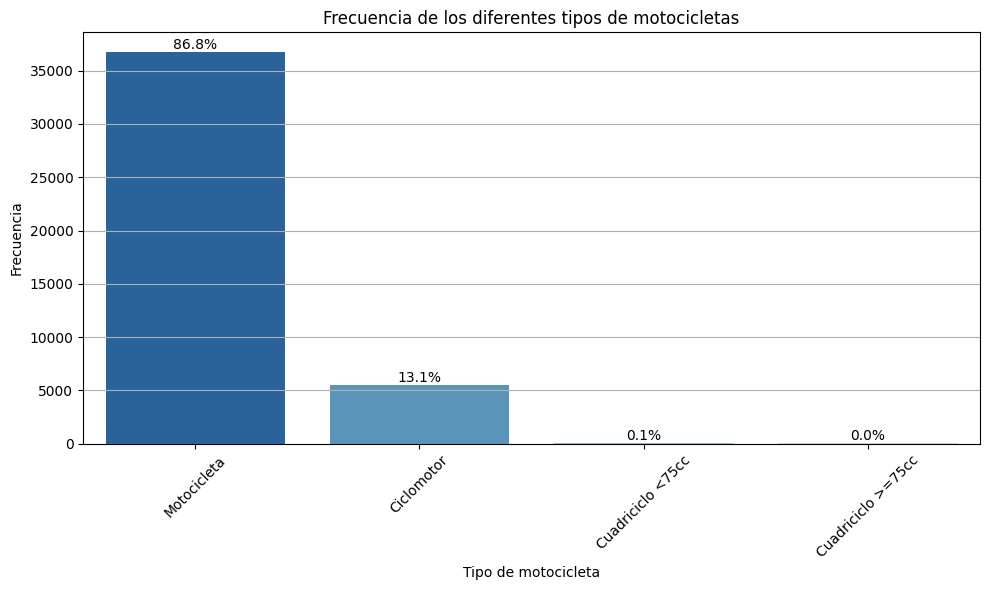

In [50]:
plotBarplot(df_motos, 'Desc_Tipus_vehicle_implicat', 'Frecuencia de los diferentes tipos de motocicletas', 'Tipo de motocicleta', 'Frecuencia')

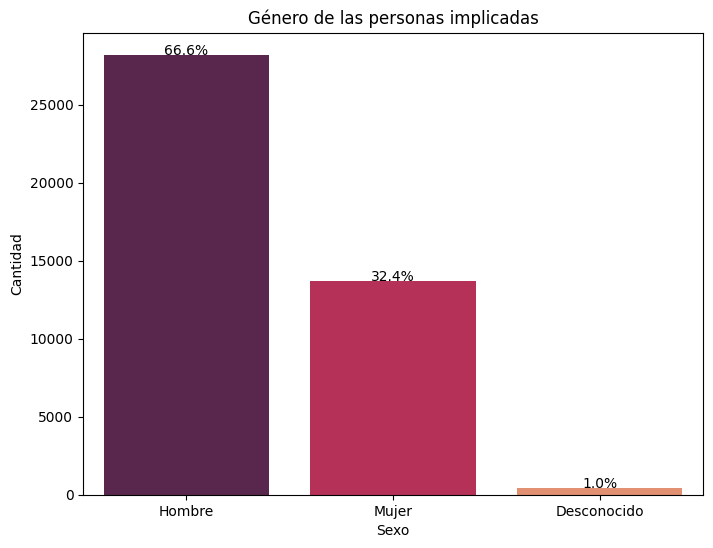

In [51]:
plotSexo(df_motos, 'Descripcio_sexe', 'Género de las personas implicadas')

Valor de la media: 37.17
Valor de la mediana: 35.00


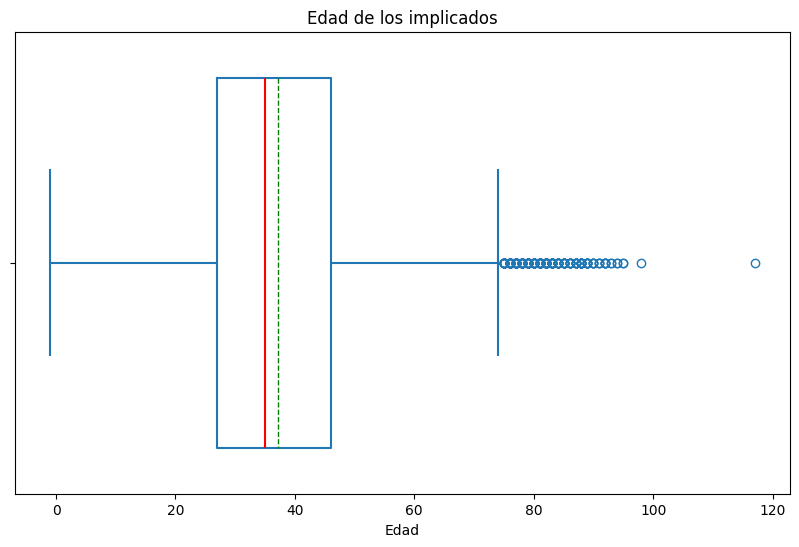

In [52]:
plotBoxplot(df_motos, 'Edat', 'Edad de los implicados', 'Edad')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


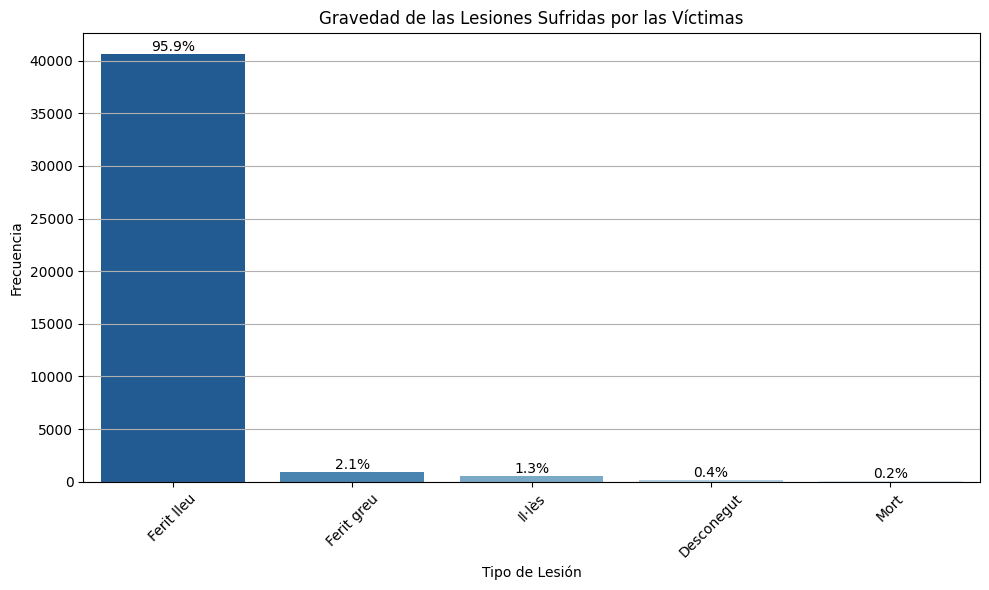

In [53]:
plotBarplot(df_motos, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')

#### Bicicletas

In [54]:
df_bicis = df[df['Tipo_Vehiculo_Agrupado'] == 'Bicicleta']

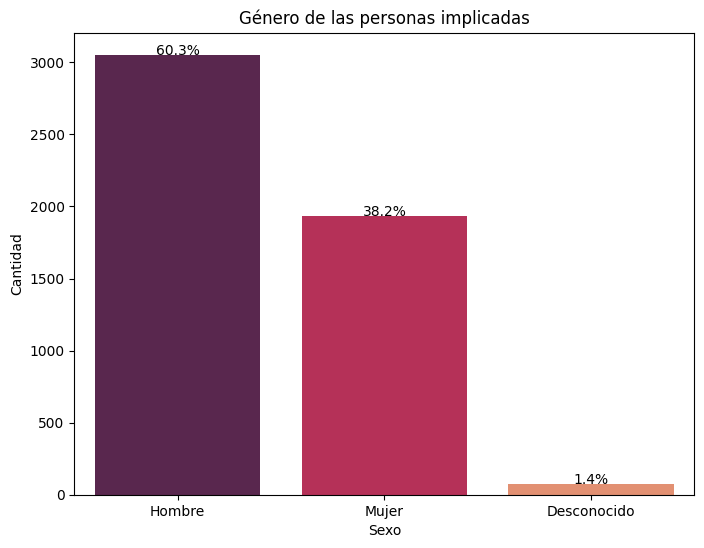

In [55]:
plotSexo(df_bicis, 'Descripcio_sexe', 'Género de las personas implicadas')

Valor de la media: 36.51
Valor de la mediana: 34.00


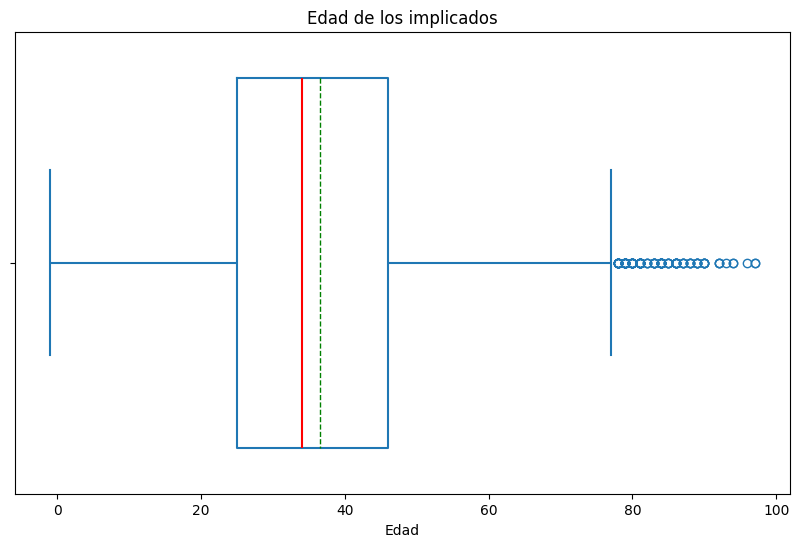

In [56]:
plotBoxplot(df_bicis, 'Edat', 'Edad de los implicados', 'Edad')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


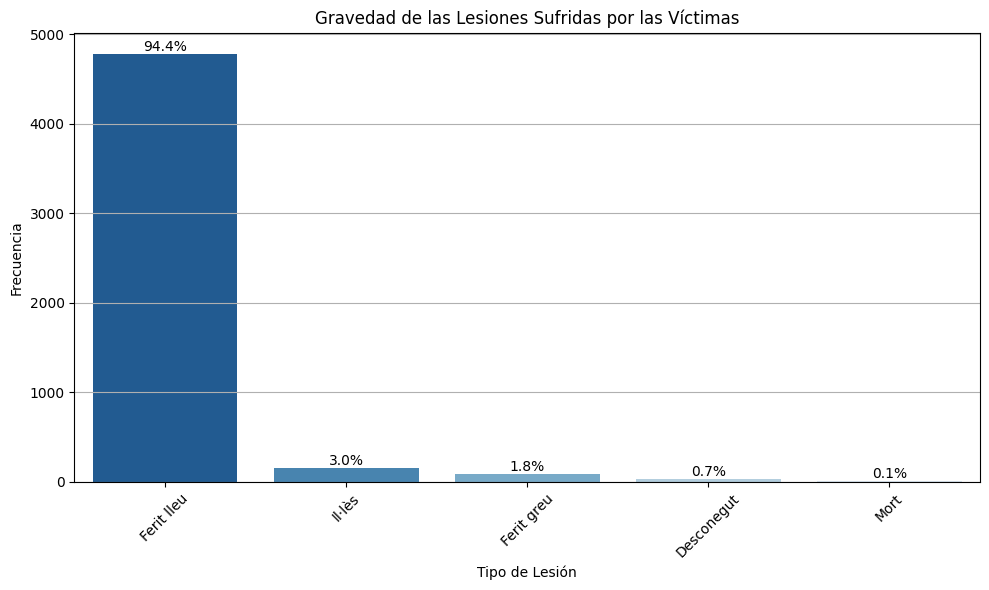

In [57]:
plotBarplot(df_bicis, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')

#### Automóviles

In [58]:
df_autos = df[df['Tipo_Vehiculo_Agrupado'] == 'Automóvil']

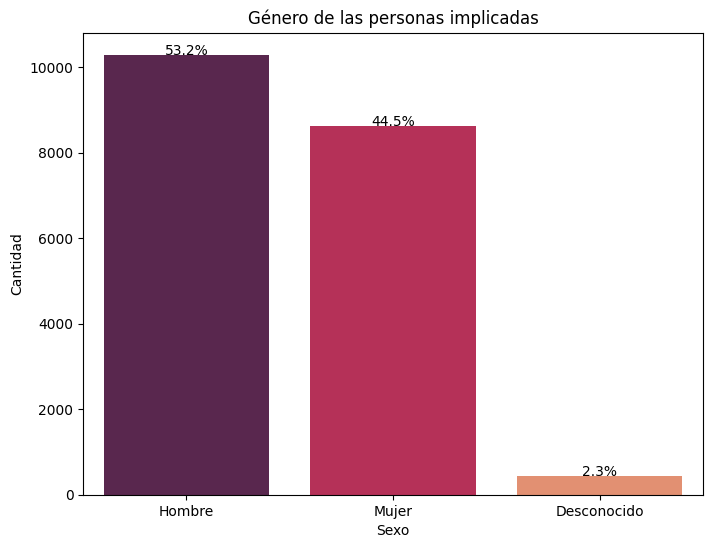

In [59]:
plotSexo(df_autos, 'Descripcio_sexe', 'Género de las personas implicadas')

Valor de la media: 38.75
Valor de la mediana: 37.00


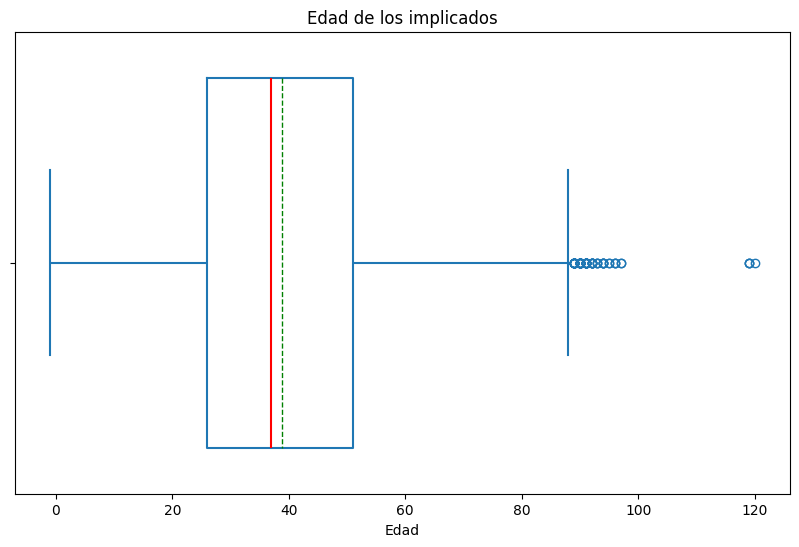

In [60]:
plotBoxplot(df_autos, 'Edat', 'Edad de los implicados', 'Edad')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


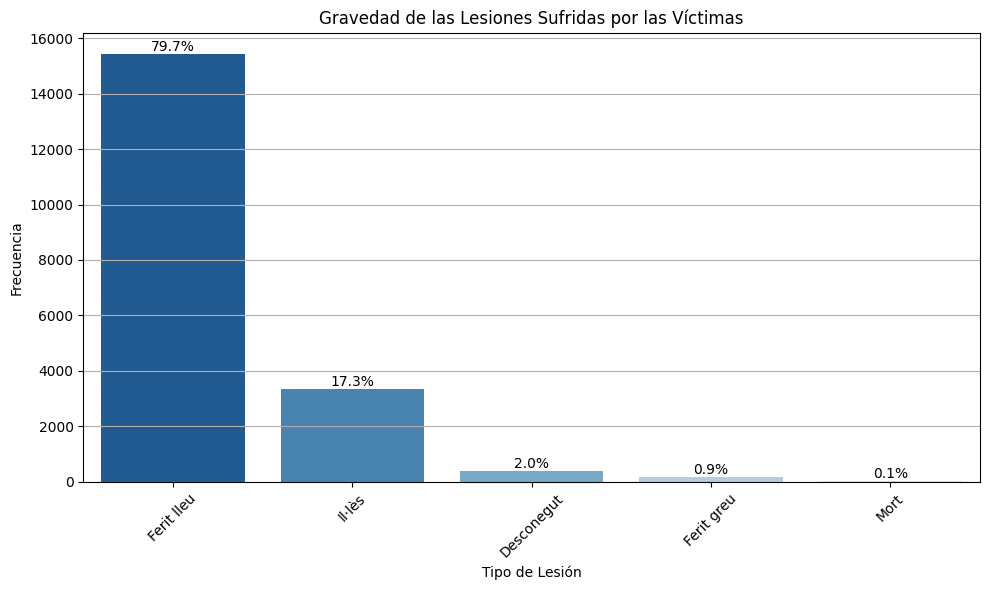

In [61]:
plotBarplot(df_autos, 'Descripcio_victimitzacio', 'Gravedad de las Lesiones Sufridas por las Víctimas', 'Tipo de Lesión', 'Frecuencia')

### Peatones

#### Motivo del desplazamiento

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


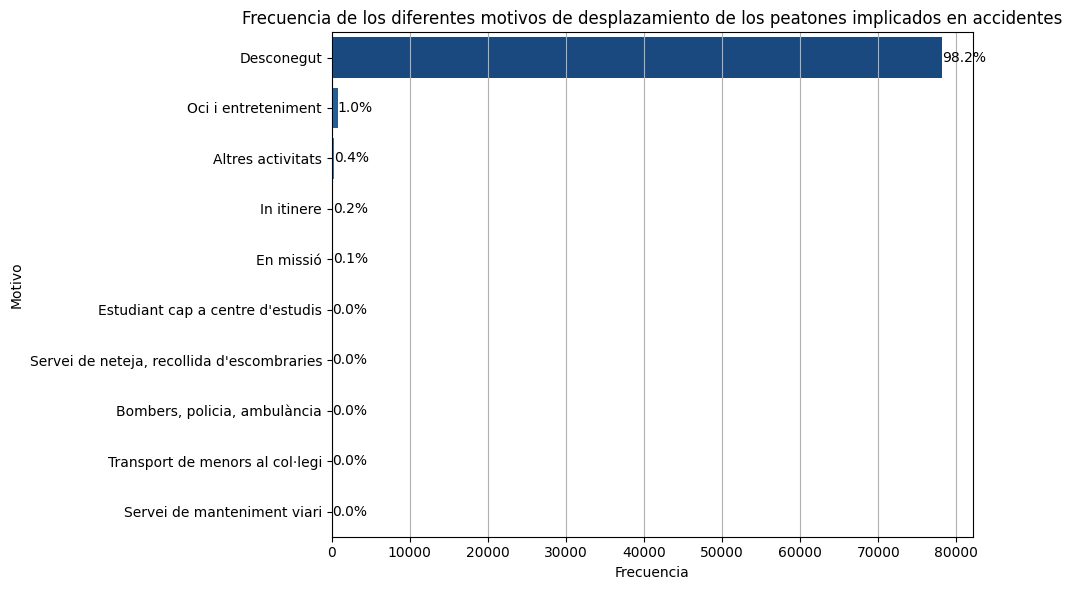

In [62]:
plotHorizontalBarplot(df, 'Descripcio_Motiu_desplaçament_vianant', 'Frecuencia de los diferentes motivos de desplazamiento de los peatones implicados en accidentes', 'Frecuencia', 'Motivo')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


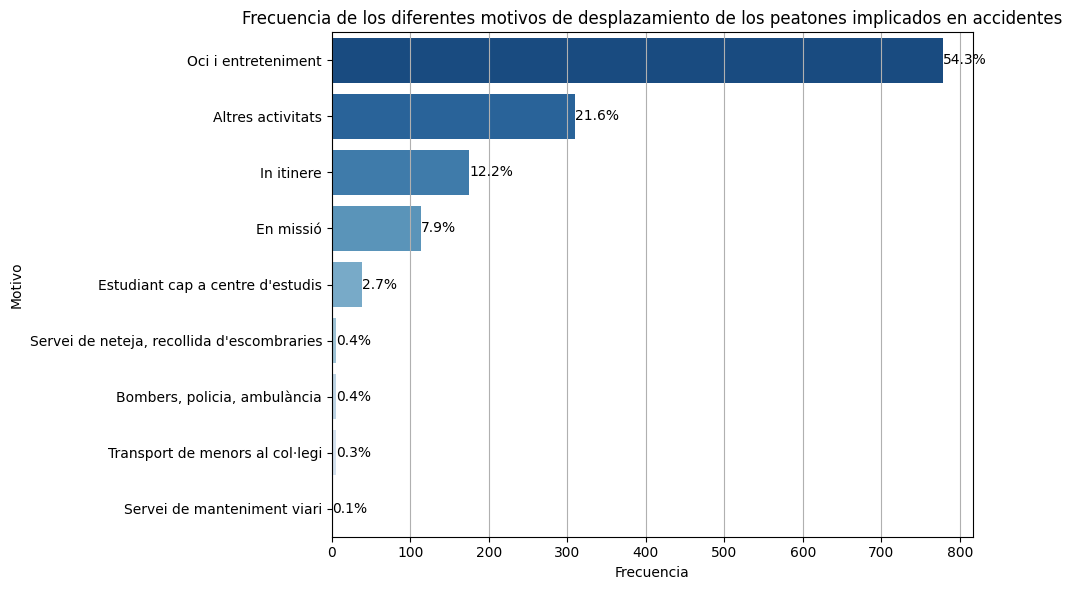

In [63]:
df_filtrado = df[(df['Descripcio_Motiu_desplaçament_vianant']!='Desconegut')]

plotHorizontalBarplot(df_filtrado, 'Descripcio_Motiu_desplaçament_vianant', 'Frecuencia de los diferentes motivos de desplazamiento de los peatones implicados en accidentes', 'Frecuencia', 'Motivo')

#### Lugar de atropellamiento

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


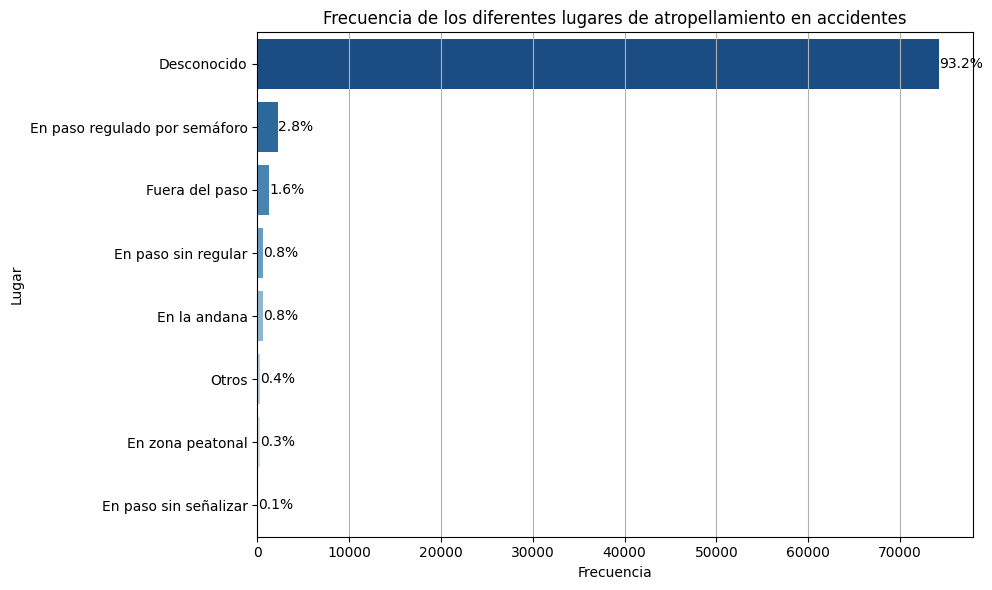

In [64]:
plotHorizontalBarplot(df, 'Descripcio_Lloc_atropellament_vianant', 'Frecuencia de los diferentes lugares de atropellamiento en accidentes', 'Frecuencia', 'Lugar')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


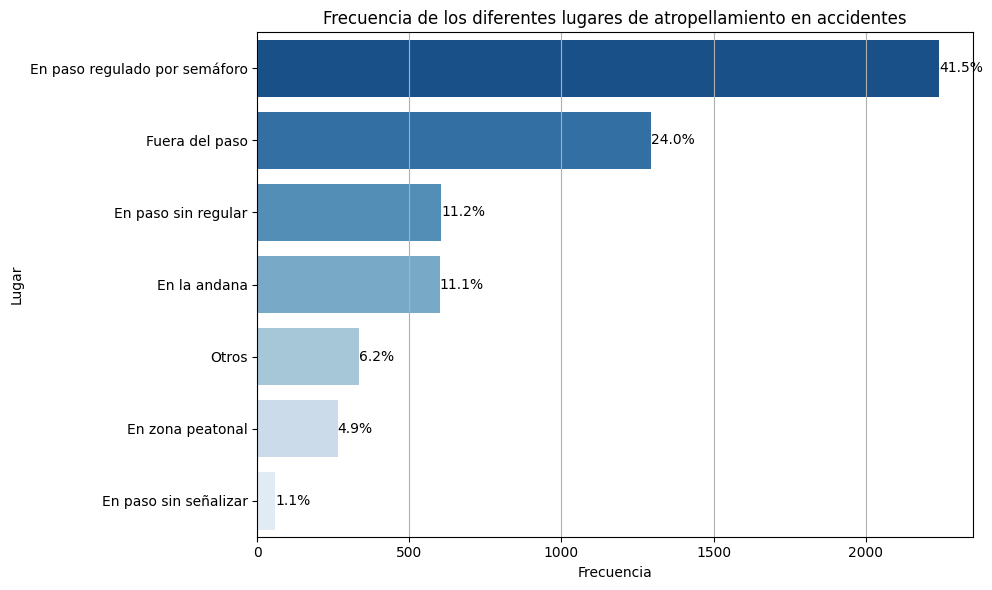

In [65]:
df_filtrado = df[(df['Descripcio_Lloc_atropellament_vianant']!='Desconocido')]

plotHorizontalBarplot(df_filtrado, 'Descripcio_Lloc_atropellament_vianant', 'Frecuencia de los diferentes lugares de atropellamiento en accidentes', 'Frecuencia', 'Lugar')

In [66]:
df.Descripcio_lesions.unique()

array(['Ferit lleu', 'Ferit greu', 'Mort',
       'Ferit lleu: Hospitalització fins a 24h',
       'Ferit greu: hospitalització superior a 24h',
       "Ferit lleu: Amb assistència sanitària en lloc d'accident",
       'Ferit lleu: Rebutja assistència sanitària',
       'Mort (dins 24h posteriors accident)', 'Il·lès', 'Desconegut',
       'Mort (després de 24h posteriors accident)', 'Mort natural'],
      dtype=object)

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


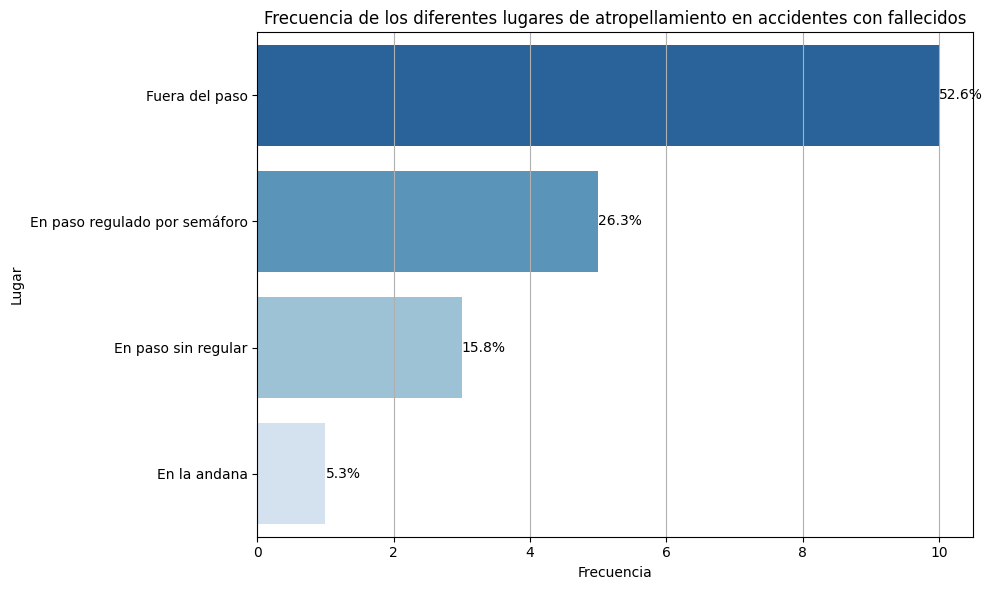

In [67]:
df_filtrado_2 = df_filtrado[df_filtrado['Descripcio_lesions'].isin(['Mort (dins 24h posteriors accident)', 'Mort (després de 24h posteriors accident)', 'Mort natural'])]

plotHorizontalBarplot(df_filtrado_2, 'Descripcio_Lloc_atropellament_vianant', 'Frecuencia de los diferentes lugares de atropellamiento en accidentes con fallecidos', 'Frecuencia', 'Lugar')

#### Causa del peatón

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


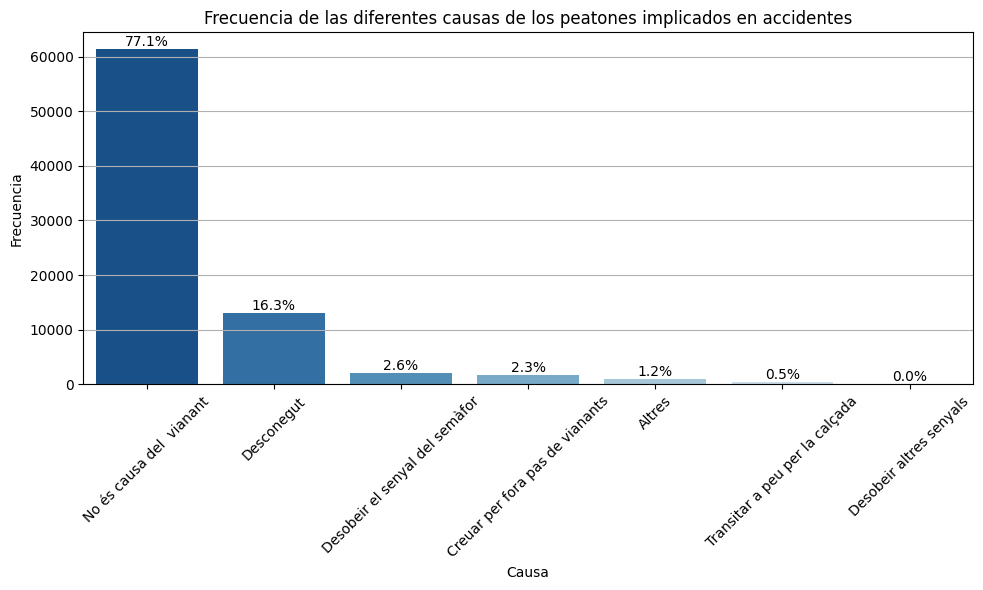

In [68]:
plotBarplot(df, 'Descripcio_causa_vianant', 'Frecuencia de las diferentes causas de los peatones implicados en accidentes', 'Causa', 'Frecuencia')

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


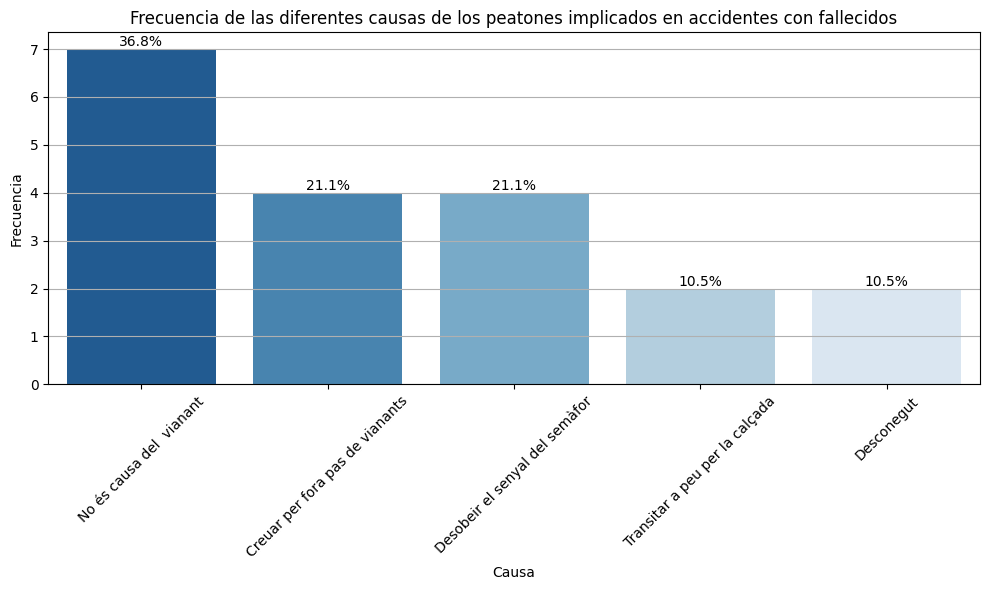

In [69]:
plotBarplot(df_filtrado_2, 'Descripcio_causa_vianant', 'Frecuencia de las diferentes causas de los peatones implicados en accidentes con fallecidos', 'Causa', 'Frecuencia')

### Descripción situación culpable

<ipython-input-11-a0b448952d5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette=paleta)


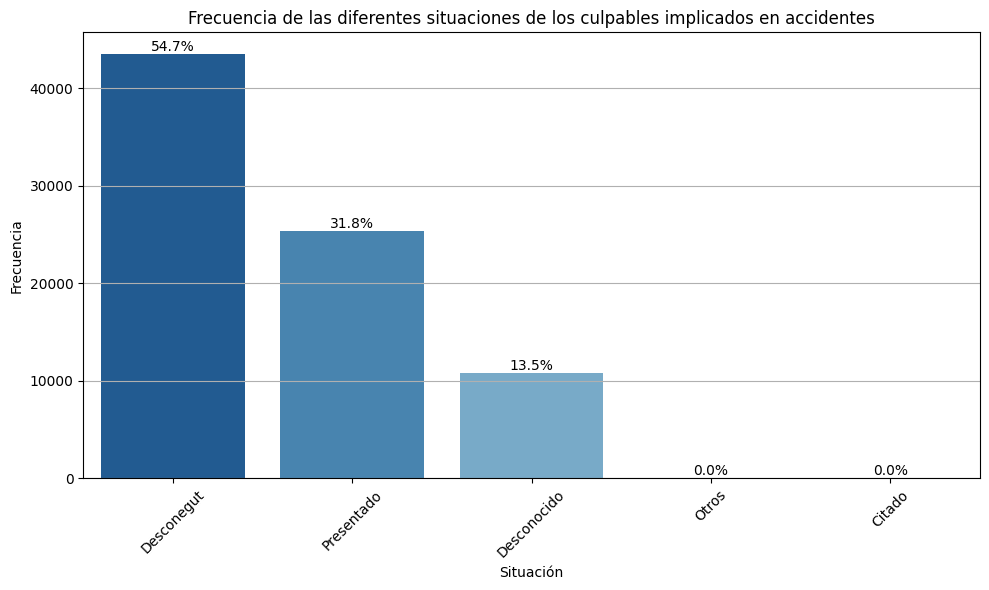

In [70]:
plotBarplot(df, 'Descripcio_situacio', 'Frecuencia de las diferentes situaciones de los culpables implicados en accidentes', 'Situación', 'Frecuencia')

### Motivo del desplazamiento del conductor

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


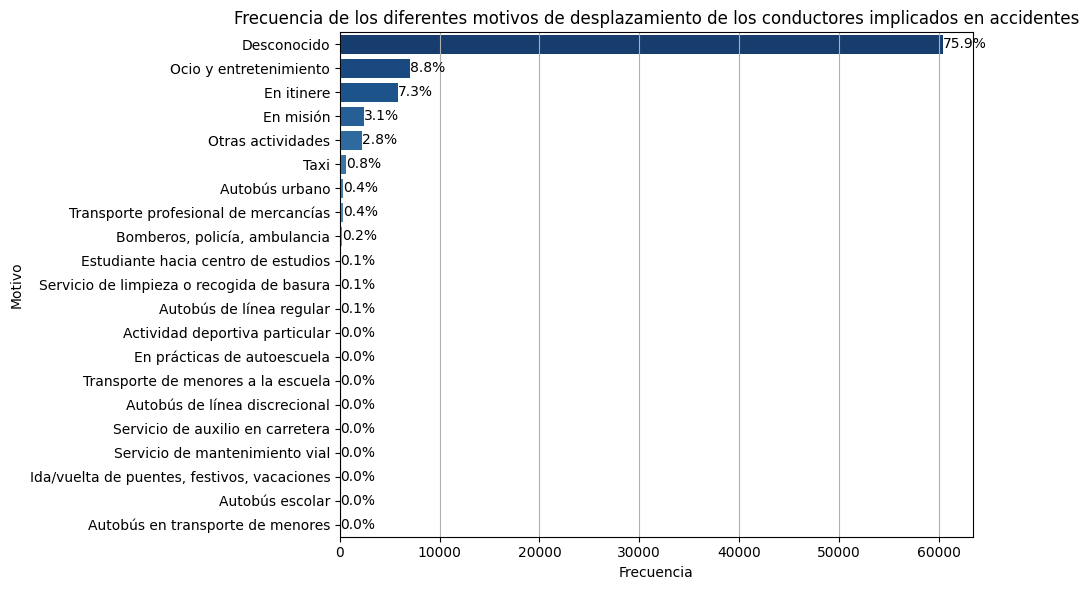

In [71]:
plotHorizontalBarplot(df, 'Descripcio_Motiu_desplaçament_conductor', 'Frecuencia de los diferentes motivos de desplazamiento de los conductores implicados en accidentes', 'Frecuencia', 'Motivo')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


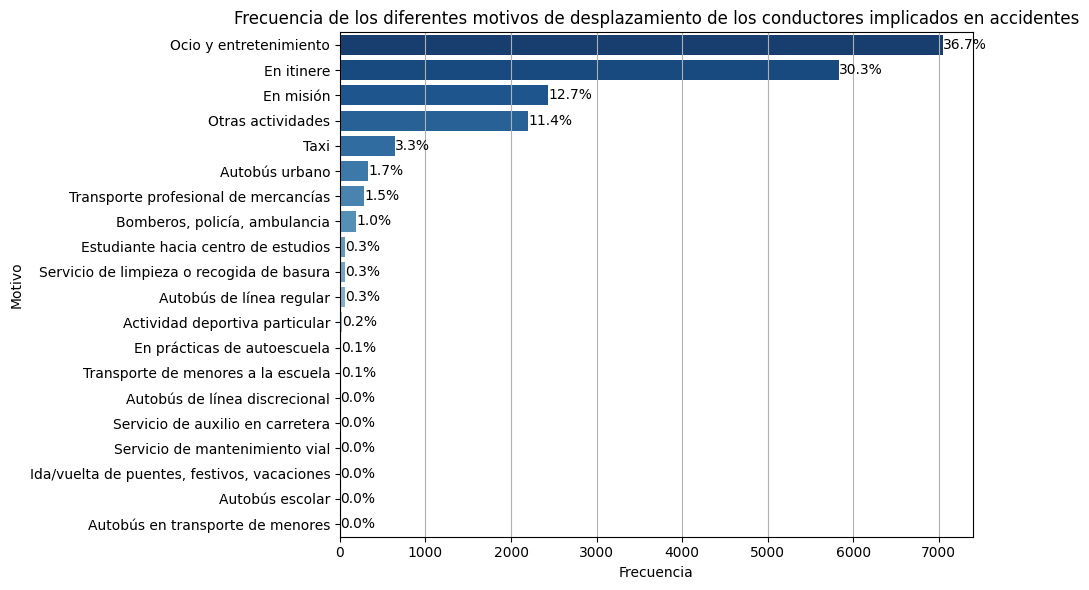

In [72]:
df_filtrado = df[(df['Descripcio_Motiu_desplaçament_conductor']!='Desconocido')]

plotHorizontalBarplot(df_filtrado, 'Descripcio_Motiu_desplaçament_conductor', 'Frecuencia de los diferentes motivos de desplazamiento de los conductores implicados en accidentes', 'Frecuencia', 'Motivo')

# Genérico

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


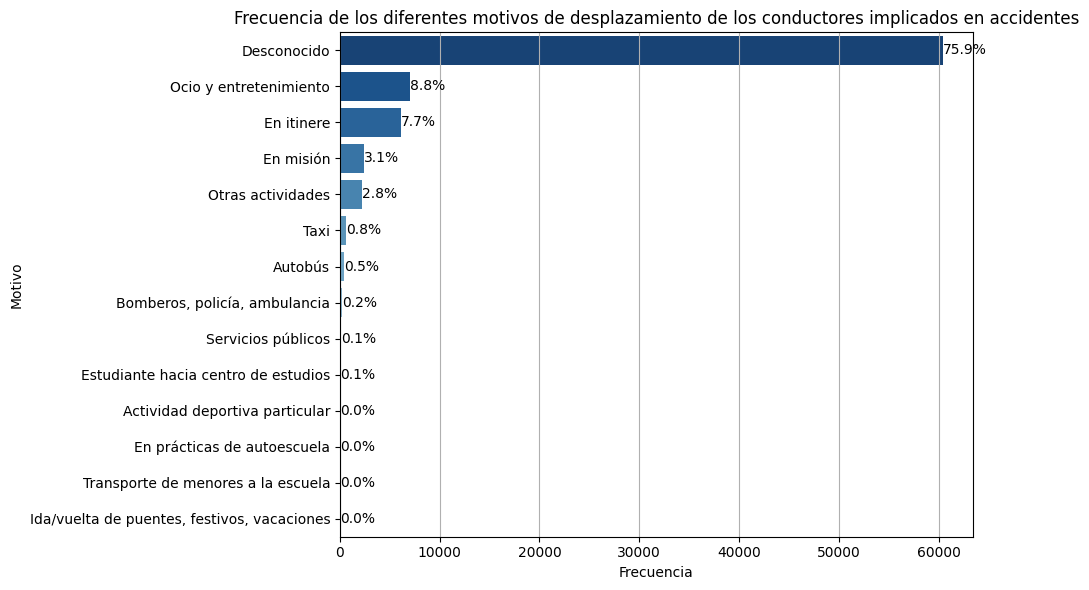

In [73]:
plotHorizontalBarplot(df, 'Motivo_desplazamiento', 'Frecuencia de los diferentes motivos de desplazamiento de los conductores implicados en accidentes', 'Frecuencia', 'Motivo')

<ipython-input-12-67e88c17632c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


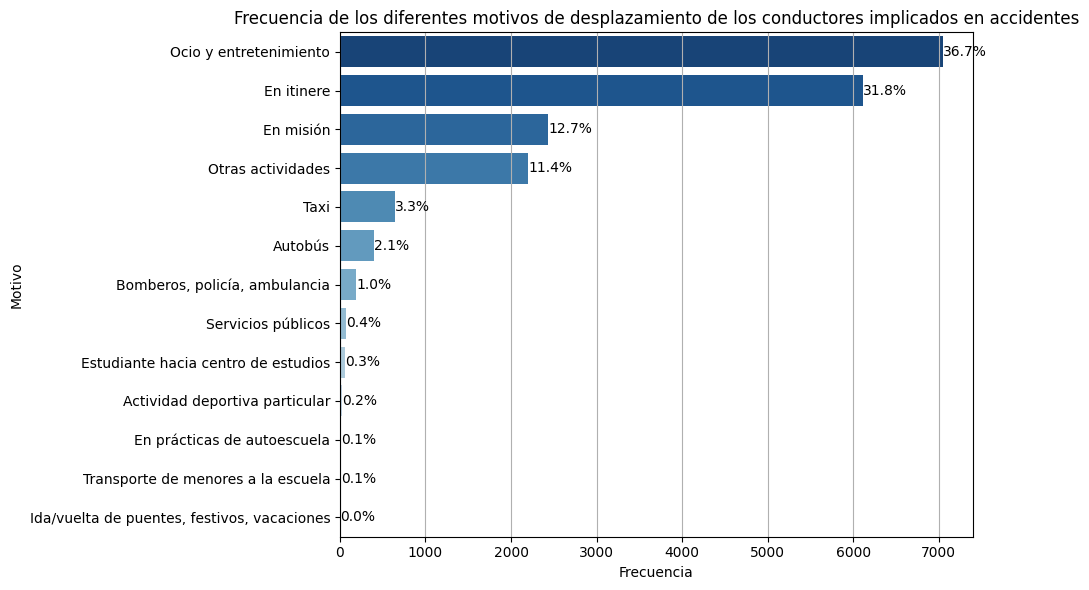

In [74]:
df_filtrado = df[(df['Motivo_desplazamiento']!='Desconocido')]

plotHorizontalBarplot(df_filtrado, 'Motivo_desplazamiento', 'Frecuencia de los diferentes motivos de desplazamiento de los conductores implicados en accidentes', 'Frecuencia', 'Motivo')

#*Evolución por localización (cruces): VICTIMAS TOTALES*


In [75]:
!pip install tabulate

In [76]:
df_victimas = df[df['Descripcio_victimitzacio'].isin(['Ferit lleu', 'Ferit Greu', 'Mort'])]
df_victimas=df_victimas.dropna(subset=['Nom_carrer'])
df_cruces = df_victimas[df_victimas['Nom_carrer'].str.contains('/')]
df_cruces['Numero_victimas'] = 1
tabla_pivote = df_cruces.pivot_table(values='Numero_victimas', index='Nom_carrer', columns='Any', aggfunc='sum', fill_value=0)
top_10_cruces = tabla_pivote.sum(axis=1).nlargest(10)
tabla_pivote_top_10 = tabla_pivote.loc[top_10_cruces.index]

tabla_pivote_top_10


<ipython-input-76-0ccd7c5429a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruces['Numero_victimas'] = 1


Any,2016,2017,2018,2019
Nom_carrer,,,,
Diagonal / Numància,0,0,27,9
Corts Catalanes / Girona,0,0,27,8
Aragó / Gràcia,0,0,23,10
Aragó / Balmes,0,0,20,12
Aragó / Catalunya,0,0,17,15
Aragó / Comte d'Urgell,0,0,17,12
Aragó / Padilla,0,0,18,9
Aragó / Sant Joan,0,0,18,9
Corts Catalanes / Gràcia,0,0,13,13


#*Evolución por localización (cruces): HERIDOS GRAVES*

In [77]:
df_victimas = df[df['Descripcio_victimitzacio'] == 'Ferit greu']
df_victimas=df_victimas.dropna(subset=['Nom_carrer'])
df_cruces = df_victimas[df_victimas['Nom_carrer'].str.contains('/')]
df_cruces['Numero_victimas'] = 1
tabla_pivote = df_cruces.pivot_table(values='Numero_victimas', index='Nom_carrer', columns='Any', aggfunc='sum', fill_value=0)
top_10_cruces = tabla_pivote.sum(axis=1).nlargest(10)
tabla_pivote_top_10 = tabla_pivote.loc[top_10_cruces.index]

tabla_pivote_top_10


<ipython-input-77-1a6a7e31c227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruces['Numero_victimas'] = 1


Any,2018,2019
Nom_carrer,,
Aragó / Aribau,3,0
Bac de Roda / Corts Catalanes,3,0
Aragó / Bailèn,1,1
Aragó / Castillejos,2,0
Aragó / Comte d'Urgell,1,1
Aragó / Padilla,2,0
Aragó / Vilamarí,1,1
Bailèn / Mallorca,2,0
Còrsega / Aribau,2,0


#*Evolución por localización (cruces): MUERTES*

In [78]:
df_victimas = df[df['Descripcio_victimitzacio'] == 'Mort']
df_victimas=df_victimas.dropna(subset=['Nom_carrer'])
df_cruces = df_victimas[df_victimas['Nom_carrer'].str.contains('/')]
df_cruces['Numero_victimas'] = 1
tabla_pivote = df_cruces.pivot_table(values='Numero_victimas', index='Nom_carrer', columns='Any', aggfunc='sum', fill_value=0)
top_10_cruces = tabla_pivote.sum(axis=1).nlargest(10)
tabla_pivote_top_10 = tabla_pivote.loc[top_10_cruces.index]

tabla_pivote_top_10

<ipython-input-78-1189e42d5928>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruces['Numero_victimas'] = 1


Any,2018,2019
Nom_carrer,,
Aragó / Casanova,1,0
Caracas / Potosí,1,0
Casanova / París,1,0
Colom / Portal de la Pau,0,1
Corts Catalanes / Bac de Roda,0,1
Corts Catalanes / Balmes,0,1
Còrsega / Villarroel,1,0
Diagonal / Pau Claris,1,0
Fabra i Puig / Canigó,1,0
